# A Granular Yelp Review Analysis - GBA 6410 Group Project Summer 2024
### Group 3: Eduardo Rivas, Jay Toney, and Thanh Ha
### July 31, 2024

# Section 1: Introduction

The goal of this analysis is to refine restaurant review scores on Yelp by focusing specifically on opinions related to food and service. Traditional Yelp ratings average all user reviews, which removes specific aspects like food quality or service experience. This analysis aims to provide more nuanced ratings that help users quickly identify restaurants based on their preferences.

**Problem Statement:**<br>

Yelp's overall rating system, which averages user scores, can mislead users who have specific needs. For example, a restaurant with excellent food but poor service might be overlooked by users focused solely on finding great food. On the other hand, a place with great service but average food could be missed by those seeking a pleasant dining experience. This can be generalized to include most user review systems, which could benefit from a similar granular breakdown of review impact.

**Proposed Solution:**<br>

We propose a method to adjust review scores by categorizing and analyzing the sentiment of review segments related to food and service. This approach leverages text mining techniques to parse review text, classify segments, conduct sentiment analysis, and calculate adjusted scores.

**Methodology:**<br>

- Text Segmentation: Review texts are divided into sentences and further chunked to isolate specific topics while maintaining context.<br>

- Classification: Each sentence and chunk is classified into relevant categories such as food, service, or other. Other contains all other aspects of the restaurant such as atmosphere, price, etc.<br>

- Sentiment Analysis: Sentiment scores are assigned to each classified segment.<br>

- Score Adjustment: Adjusted scores are calculated based on the weighted sentiment of categorized segments relative to the entire review.<br>

**Approach:** <br>

Our primary approach for splitting the sentences as needed relies on two factors: 
1. Conflicting topics<br>
2. Conflicting sentiment<br>

If a sentence contains either one or both, then it consititutes further parsing. A completely positive sentence with context for both food and service needs to be split so that the category of food and service can be isolated for measurement. On the other hand, a sentence that's just about food but contains both positive and negative opinions needs to be split to perserve the impact of both opinions. If the sentence contains conflicting topics and sentiments, then it will definitely need to be split. The good news about this is that many sentences in reviews are simple, so a lot of them don't require further chunking. 

# Section 2: Literature Review

We took a look at a full spectrum of best practices and leading research in the field of opinion mining and Aspect-Based Sentiment Analysis (ABSA). We wanted to explore the wide array of classification and sentiment models, but more importantly, the combination of these methods that allow for the preservation of sentiment and context. What we found is that this is a relatively well-established but rapidly evolving field of research and offers plenty of opportunity for the development of novel approaches. 

We first took a look at the standard approach for best practice review analysis. A paper by Andrew Elkouri focuses on developing machine learning classifiers to predict sentiment polarity and star ratings of Yelp reviews using only the text. The study employs Naive Bayes, Support Vector Machines (SVM), and Logistic Regression, with Logistic Regression achieving the highest accuracy for both tasks. The process involved text preprocessing, vectorization using the bag-of-words model, and applying term frequency-inverse document frequency (tf-idf) to weigh the importance of words. The classifiers were trained and tested on a dataset from the Yelp Dataset Challenge, containing reviews from multiple cities and business types. Logistic Regression's superior performance was attributed to its ability to handle complex patterns in the text better than the other models. While positive/negative classification was found to be relatively straightforward, predicting star ratings proved more challenging due to the nuanced language used in reviews with different star ratings. The paper suggests that future improvements could come from using more advanced models like Random Forests or Neural Networks, incorporating more data, and leveraging additional features such as review metadata and business attributes to enhance classification accuracy. This research highlights the potential of machine learning to automate sentiment and rating predictions, potentially improving the reliability and usefulness of online reviews (Elkouri, 2015). 

Next we ventured into more into the realm of ABSA, combining methods of topic modeling with sentiment analysis. A paper by Twil Ali and colleagues provides a methodology that combines topic modeling and sentiment analysis to extract insights from user-generated reviews on TripAdvisor, specifically focusing on Marrakech city. The approach emplyes LDA to group together review topics and then applies sentiment analysis to assess the polarity of each topic. This method appears to identify strengths and weaknesses of various tourism hubs by analyzing aspects such as attractions, shopping experiences, local behavior, and overall tourist satisfaction. The study only used English reviews and preprocessing techniques to clean the data, followed by sentiment analysis using VADER and TextBlob. These models measure the emotional weight of reviews, highlighting users' likes, dislikes, and concerns. The paper compares sentiment scores against TripAdvisor's rating system, finding that the sentiment models provide an accurate measure of tourist feedback, which can assist in improving tourism services. The limitations that exist with this approach include the inability to detect sarcasm along with only using English text (Ali, 2022).

Due to the limitations of LDA, we expanded our search into other methods of topic modeling in hopes of finding methods that would be more capable of identifying sarcasm and could be applied to multiple languages. Research conducted by Roman Egger in 2022 provides an extensive overview of the application of topic modeling techniques in tourism, focusing on their ability to identify hidden semantic structures in textual data. The chapter begins by highlighting the importance of analyzing the vast amount of user generated content on the internet where it provides valuable insights into customer preferences. The article covers various topic modeling approaches, including LDA, NMF, CorEx, Top2Vec, and BERTopic, each with unique advantages and limitations. We've already covered LDA so we won't discuss it further here. NMF and CorEx are presented as alternative models that can sometimes yield better results depending on the context, but still had their own drawbacks similar to LDA and required more specific use cases. The two standout models from this paper were Top2Vec and BERTopic. Top2Vec is a method that uses embedded semantic tags of documents and words to generate topic vectors. This method improves the preservation of context, resulting in better topic groupings than the previously mentioned models. Another benefit of this model is the reduction in preprocessing steps, as well as not requiring a specified number of topics to group by. BERTopic is similar in its use of word embeddings but implements its own class-based version of TF-IDF. It's an improvement from the LDA model because it can handle multiple languages and better preserves context like Top2Vec. However, this model requires an annotated dataset and training for proper implementation. Overall, it's apparent that topic modeling methods are heavily dependent on the use case and there isn't a 'one-size-fits-all' model. Choosing the appropriate model for analysis is critical (Egger, 2024).

We found an interesting, novel approach for analyzing online product reviews that proposes a probabilistic topic model called Tag Sentiment Aspect model (TSA), which expands the LDA framework. Unlike traditional models that focus solely on word frequencies, TSA incorporates syntactic information, specifically Part-of-Speech (POS) tags, to improve sentiment classification and aspect extraction. The authors introduce three versions of TSA, each leveraging POS tags differently to enhance the identification of latent topics and corresponding sentiments within reviews. The models are designed to identify product aspects and customer sentiment simultaneously, outputting clearer insights into user opinions. The TSA models require minimal labeled data, relying only on a small set of positive and negative seed words, making them practical and scalable. Experiments conducted on datasets from digital SLR and laptop reviews demonstrate that TSA achieves promising results in both sentiment classification and aspect extraction. The model effectively distinguishes between sentiment words and aspect words, which can inform product design and marketing strategies. TSA's ability to adapt to domain-specific sentiment words through asymmetric hyperparameters further enhances its applicability across various product domains. Overall, TSA offers a robust and unsupervised method for mining actionable insights from large volumes of online reviews, surpassing the limitations of existing supervised models by not requiring extensive manual labeling (Tang, 2019).

The closest topic we found to our own approach was a dissertation by Muhammad Abbas Al-Khiza’ay. He discusses a framework for personalized review selection in social networks, focusing on micro-reviews, which are small reviews found on sites like Foursquare and Yelp. The framework, named PeRView, aims to filter out fake reviews and select genuine, high-quality reviews that align with user preferences. PeRView uses several algorithms: the Personalized Review Selection Algorithm (PRSA) to match reviews with user preferences using similarity measures; the Micro-Reviews Selection Algorithm (MRSA) to curate a set of micro-reviews for empirical study; and the MaxPerCoverage Evaluation Algorithm (MEA) to evaluate and finalize the selection of personalized reviews. The Personalized Aspect Analysis Model (PAAM) enhances this framework by considering user preferences, sentiment polarity, and subject relevance, while still relying on LDA for aspect analysis. His research emphasizes the need for better methods of granular review insights, which contribute to improving decision-making processes for users in various domains. This framework demonstrates high accuracy in selecting personalized reviews, but the complexity associated with it extend beyond our scope (Al-Khiza’ay, 2020).

One gap identified in the literature is that, while ABSA aims to extract more accurate topic and it's associated sentiment from review text, these models stop short of attempting to get quanifiable metrics that could be used to inflate or deflate the overall score by filtering out unimportant categories. There is a need to quantify text data representing user opinions while preserving context and sentiment, and by maintaining both, a high-definition view into review data could be achieved. Our approach involves chunking Yelp review text into its constituent parts, single units of preserved context and sentiment, allowing for a mathematically adjusted review score based on various categories of interest. This idea is novel and valuable as it eliminates the need for users to sift through reviews to gain insights into important aspects of restaurants, businesses, and products.

# Section 3: Dataset and Data Cleaning

## Importing Libraries and Data

The dataset we're using is a subset of restaurants from the Yelp Data Challenge dataset taken from Kaggle. We chose 9 restaurants from Santa Barbara that span different types and scores.

In [1]:
import re
import contractions
import pandas as pd
import spacy
import warnings

# List of all warning encountered in script
warnings_to_suppress = [DeprecationWarning,
                        UserWarning,
                        FutureWarning,
                        ]

# Suppress deprecation warnings
for warning in warnings_to_suppress:
    warnings.filterwarnings("ignore", category=warning)

# Load spaCy model
nlp = spacy.load('en_core_web_md')

# Load the CSV file
df = pd.read_csv('yelp_review_dataset.csv')
print(df.shape)
df.head()

c:\Users\justi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(2381, 9)


,business_name,overall_score,review_id,review_score,text,useful,funny,cool,date
0,Paradise Cafe,3.5,zM7u3iffMjniyvQAaN9Tnw,1.0,So disappointing on so many levels. Have been ...,0,1,0,2012-05-29 03:51:08
1,Paradise Cafe,3.5,wh9ea5TEl4oKiSr2k_R1eA,4.0,We were on our way home from a camping trip an...,1,0,1,2016-01-04 03:55:32
2,Paradise Cafe,3.5,mcVDsGVUncpg6LJeZ961NQ,4.0,My wife and I have been coming to Paradise for...,0,0,1,2016-06-22 21:51:45
3,Paradise Cafe,3.5,T348a5HPcv00_jxnlSZe-w,5.0,Been here twice...once just for drinks and onc...,0,0,0,2014-07-28 05:56:16
4,Paradise Cafe,3.5,TYslH-CAecjJxLNs96KduA,5.0,Lovely little restaurant which was converted f...,0,0,0,2005-03-01 17:47:15


## Light Data Cleaning

We remove the columns that aren't required for our analysis, and apply a couple preprocessing functions to prepare the text. We expand contractions, remove html breaks, and lower case everything.

In [2]:
# Columns to remove
columns_to_remove = ['date', 'useful', 'funny', 'cool']
df_cleaned = df.drop(columns=columns_to_remove)

# Function to replace \n\n with a period and remove all other punctuation except for periods and apostrophes
def preprocess_text(text):
    text = contractions.fix(text)  # Expand contractions
    text = text.replace('\n\n', '').replace('\n', '. ')
    text = text.lower()
    return text

df_cleaned['text'] = df_cleaned['text'].apply(preprocess_text)
df_cleaned.head()

,business_name,overall_score,review_id,review_score,text
0,Paradise Cafe,3.5,zM7u3iffMjniyvQAaN9Tnw,1.0,so disappointing on so many levels. have been ...
1,Paradise Cafe,3.5,wh9ea5TEl4oKiSr2k_R1eA,4.0,we were on our way home from a camping trip an...
2,Paradise Cafe,3.5,mcVDsGVUncpg6LJeZ961NQ,4.0,my wife and i have been coming to paradise for...
3,Paradise Cafe,3.5,T348a5HPcv00_jxnlSZe-w,5.0,been here twice...once just for drinks and onc...
4,Paradise Cafe,3.5,TYslH-CAecjJxLNs96KduA,5.0,lovely little restaurant which was converted f...


## Breaking Down Review Text

To analyze the text in a granular way, we need to try and parse the text into small enough pieces that isolate the topics of interest while preserving the general sentiment toward it. To accomplish this initially, we created two lists of seed terms, one for food and one for service.

In [3]:
# Define the seed terms
seed_food_terms = [
    "food", "meal", "dish", "menu", "wine", "drink", "beverage", "dessert", "dinner", "lunch",
    "breakfast", "appetizer", "entrée", "snack", "cuisine", "recipe", "ingredient", "flavor",
    "taste", "delicious", "savory", "sweet", "sour", "bitter", "spicy", "mild", "salty", "fresh",
    "organic", "gourmet", "homemade", "hearty", "nutritious", "healthy", "unhealthy", "junk food",
    "fast food", "restaurant", "café", "bistro", "diner", "eatery", "pub", "bar", "bakery",
    "patisserie", "confectionery", "delicatessen", "grocery", "supermarket", "market", "butcher",
    "fishmonger", "produce", "fruit", "vegetable", "meat", "poultry", "seafood", "dairy", "cheese",
    "milk", "yogurt", "butter", "cream", "egg", "bread", "cereal", "grain", "pasta", "rice",
    "noodle", "soup", "stew", "salad", "sandwich", "burger", "pizza", "taco", "burrito", "sushi",
    "sashimi", "ramen", "dumpling", "pie", "cake", "cookie", "muffin", "pastry", "croissant",
    "tart", "pudding", "custard", "jelly", "jam", "honey", "syrup", "sauce", "condiment", "spice",
    "herb", "seasoning", "marinade", "dip", "spread", "margarine", "oil", "vinegar", "salt",
    "pepper", "chili", "garlic", "onion", "ginger", "cinnamon", "nutmeg", "basil", "oregano",
    "thyme", "rosemary", "parsley", "cilantro", "dill", "mint", "sage", "turmeric", "paprika",
    "cumin", "curry", "mustard", "ketchup", "mayonnaise", "relish", "pickle", "olive", "caper",
    "anchovy", "sausage", "bacon", "ham", "steak", "roast", "grill", "barbecue", "fry", "sauté",
    "steam", "boil", "bake", "simmer", "poach", "broil", "toast", "braise", "scramble", "whip",
    "blend", "chop", "dice", "slice", "grate", "peel", "mash", "knead", "roll", "season",
    "marinate", "glaze", "caramelize", "ferment", "pickle", "cure", "smoke", "dry", "preserve",
    "can", "jar", "freeze", "chill", "thaw", "heat", "reheat", "cool", "warm", "serve", "plate",
    "garnish", "decorate", "infuse", "brew", "steep", "grind"
]

seed_service_terms = [
    "waiter", "waitress", "staff", "server", "host", "hostess", "manager", "bartender", "customer",
    "service", "hospitality", "courteous", "attentive", "prompt", "responsive", "professional",
    "welcoming", "friendly", "polite", "helpful", "accommodating", "efficient", "respectful",
    "patient", "knowledgeable", "approachable", "understanding", "thorough", "diligent", "bar",
    "detail-oriented", "service-oriented", "concierge", "receptionist", "bellhop", "valet",
    "housekeeper", "room service", "front desk", "reservation", "booking", "check-in", "check-out",
    "greeter", "cashier", "desk clerk", "attendant", "porter", "butler", "steward", "stewardess",
    "sommelier", "maître d'", "coat check", "janitor", "security", "usher", "guide", "escort",
    "caretaker", "masseuse", "therapist", "technician", "maintenance", "repairman", "driver",
    "chauffeur", "operator", "dispatcher", "facilitator", "advisor", "consultant", "representative",
    "agent", "specialist", "coordinator", "planner", "organizer", "handler", "contractor", "cleaner",
    "caterer", "decorator", "hostler", "groom", "clerk", "delivery", "supplier", "provider", "vendor",
    "distributor", "helper", "support", "back office", "front office", "customer service",
    "client service", "guest service", "public relations", "communication", "interaction", "interface",
    "transaction", "follow-up", "engagement", "satisfaction", "complaint", "feedback", "survey",
    "review", "rating", "testimonial", "endorsement", "loyalty", "retention", "relationship",
    "rapport", "trust", "credibility", "dependability", "reliability", "assurance", "quality",
    "excellence", "standard", "expectation", "delight", "pleasure", "surprise", "appreciation",
    "gratitude", "recognition", "reward", "benefit", "advantage", "convenience", "comfort", "amenity",
    "luxury", "premium", "exclusive", "priority", "VIP", "treatment", "care", "attention", "effort",
    "commitment", "dedication", "passion", "enthusiasm", "zeal", "motivation", "initiative",
    "innovation", "improvement", "upgrade", "enhancement", "refinement", "customization",
    "personalization", "adjustment", "modification", "flexibility", "adaptability", "improvisation",
    "creativity", "resourcefulness", "solution", "resolution", "remedy", "fix", "correction",
    "troubleshooting", "diagnosis", "analysis", "investigation", "exploration", "inquiry",
    "inspection", "evaluation", "assessment", "appraisal", "examination", "audit", "questionnaire",
    "interview", "consultation", "discussion", "meeting", "conference", "session", "briefing",
    "debriefing", "presentation", "demonstration", "workshop", "seminar", "training"
]

We initially remove all the non-English reviews from our text data. El Torito had many reviews in Spanish and since we selected LDA for topic modeling, we needed to ensure all of our text was in English. 

Next, we split all the reviews into their sentences. During this stage, we also ran a calculation to get the weight of each sentence relative to the entire review. We did that by dividing the word count of each sentence by the total word count of the parent review. 

At this stage, we're ready to try and chunk the data appropriately. We only applied this chunking to sentences that were identified as having multiple topics in them. If the sentence only contained food related term, then we left it intact. If there were conflicting topics, then we'd split the sentence up where the second topic was located in the sentence. This approach is imperfect and could benefit from further refinement, but we verified through several samples of the the data and felt comfortable enough to proceed with our analysis. 

In the future, we'd like to try a more sophisticated approach based on POS tags. 

In [4]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from bs4 import BeautifulSoup
from nltk.tokenize import wordpunct_tokenize, word_tokenize
import emoji

# Function to split text into sentences
def split_text_to_sentences(df):
    new_rows = []
    for _, row in df.iterrows():
        doc = nlp(row['text'])
        sentences = [sent.text for sent in doc.sents]
        for sentence in sentences:
            new_row = row.copy()
            new_row['text'] = sentence
            new_rows.append(new_row)
    return pd.DataFrame(new_rows)

# Function to calculate sentence weights relative to the review
def calculate_sentence_weights(df):
    new_rows = []
    for idx, review in df.groupby('review_id'):
        total_length = review['text'].apply(lambda x: len(x.split())).sum()  # Total length of the review
        for _, row in review.iterrows():
            sentence_length = len(row['text'].split())
            proportional_weight_sentence = sentence_length / total_length if total_length > 0 else 0  # Proportional weight of the sentence

            new_row = row.copy()
            new_row['weight_sentence'] = proportional_weight_sentence
            new_rows.append(new_row)
    return pd.DataFrame(new_rows)

def split_sentences_to_chunks(df):
    new_rows = []
    for _, row in df.iterrows():
        doc = nlp(row['text'])
        for sent in doc.sents:
            # Initialize flags to check for seed terms
            contains_food_term = False
            contains_service_term = False

            # Check if the sentence contains both types of seed terms
            for token in sent:
                if token.text.lower() in seed_food_terms:
                    contains_food_term = True
                if token.text.lower() in seed_service_terms:
                    contains_service_term = True

            # Split into chunks if both seed terms are found in the sentence
            if contains_food_term and contains_service_term:
                chunk = []
                chunks = []
                found_first_seed = False
                for token in sent:
                    if token.text.lower() in seed_food_terms or token.text.lower() in seed_service_terms:
                        if chunk and found_first_seed:
                            chunks.append(chunk)  # Add the current chunk if a seed has already been found
                            chunk = []  # Start a new chunk
                        found_first_seed = True  # Mark that we have found a seed term
                    chunk.append(token.text)  # Add the token to the current chunk

                if chunk:
                    chunks.append(chunk)  # Add the last chunk if it exists

                for chunk in chunks:
                    new_row = row.copy()
                    new_row['text'] = ' '.join(chunk)
                    new_rows.append(new_row)
            else:
                # If the sentence doesn't contain both types of seed terms, add it as a whole
                new_row = row.copy()
                new_row['text'] = sent.text
                new_rows.append(new_row)

    return pd.DataFrame(new_rows)

def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

def filter_english_entries(df, text_column):
    df['is_english'] = df[text_column].apply(is_english)
    df_english  =df[df['is_english']].drop(columns = ['is_english'])
    return df_english

# Default spaCy stop words
all_stopwords = list(nlp.Defaults.stop_words)

# Custom stop words
custom_stop_words = ['the', 'and', 'was', 'for', 'but', 'with', 'this',
                     'pretty', 'super', 'very', 'quite', 'short', 'santa', 'barbara']

# Combine default stop words with custom stop words
all_stopwords.extend(custom_stop_words)

def preprocess_text(text):
    # Check if text is a string (not NaN)
    if isinstance(text, str):
        # Remove HTML tags using BeautifulSoup
        text = BeautifulSoup(text, "html.parser").get_text()

        # Remove special characters and punctuation using regex
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        # Remove emoji
        text = emoji.replace_emoji(text, replace='')

        # Remove single characters
        text = re.sub(r'\b\w\b', '', text)

        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()

        # Convert to lowercase and tokenize
        words = word_tokenize(text.lower())

        # Remove stop words
        stop_words = set(all_stopwords)
        filtered_words = [word for word in words if word not in stop_words]

        # Remove words that are 2 characters or less
        filtered_words = [word for word in filtered_words if len(word) > 2]

        # Join filtered words into a single string for spaCy processing
        filtered_comment = ' '.join(filtered_words)

        # Lemmatize the text using spaCy
        doc = nlp(filtered_comment)
        lemmatized_text = ' '.join([token.lemma_ for token in doc])

        # Join the lemmatized words back into a single string
        processed_comment = lemmatized_text
    else:
        processed_comment = ""

    return processed_comment

Using our functions, we apply the following steps to each review:

1. Filter out non-english reviews <br>
2. Split the reviews into sentences, creating new rows but retaining identification related to the original review <br>
3. Calculate the weight of the sentence relative to the entire review by token count <br>
4. Compare the words in each sentence to the decide if multiple topics are within each sentence, if so, break the sentence into chunks where the new topic begins <br>
5. Apply a full text cleaning process to the chunks of text <br>

After applying these preprocessing steps, the text data is ready to be explored and analyzed.

In [5]:
# Remove non-english reviews
df_reviews = filter_english_entries(df_cleaned, 'text')

# Split reviews into sentences & calculate weight
df_sentences = split_text_to_sentences(df_reviews)
df_sentences = calculate_sentence_weights(df_sentences)

# Split sentences into chunks to try and split by context
df_chunks = split_sentences_to_chunks(df_sentences)

# Apply full scope of general text cleaning processes
df_chunks['process_text'] = df_chunks['text'].apply(preprocess_text)
df_chunks.head()

,business_name,overall_score,review_id,review_score,text,weight_sentence,process_text
664,The Cruisery,4.0,--ZJoZprz2kblpAg_ORC8A,5.0,first time visit yesterday and had a great bri...,0.342857,time visit yesterday great brie chicken sandwich
664,The Cruisery,4.0,--ZJoZprz2kblpAg_ORC8A,5.0,ali our server was great and took us through a...,0.657143,ali server great take
664,The Cruisery,4.0,--ZJoZprz2kblpAg_ORC8A,5.0,menu items that we will have to try during our...,0.657143,menu item try visit
25,Paradise Cafe,3.5,-1u0FfvpsDOvqMrzu4OQmQ,5.0,one of our favorite local places as locals.,0.242424,favorite local place local
25,Paradise Cafe,3.5,-1u0FfvpsDOvqMrzu4OQmQ,5.0,"food is consistently good, and they all work a...",0.333333,food consistently good work team


One last step is to create dataframe that will be used for the final output. This only contains the business name and the overall review score.

In [6]:
from scipy.stats import mode

# Function to get mode
def calculate_mode(series):
    return mode(series).mode[0]

# Drop columns not needed for business df
business_df = df_reviews.drop(columns=['review_id', 'review_score'])

# All review text aggregated by business
business_df = df_reviews.groupby('business_name').agg({'overall_score': calculate_mode})
business_df

,overall_score
business_name,
Breakwater Restaurant,3.5
El Torito,2.5
Epic Bowl,3.5
Moby Dick Restaurant,3.0
Paradise Cafe,3.5
Soul Cal Smokehouse,3.5
Stonehouse Restaurant,4.5
The Cruisery,4.0
The Drunken Crab,4.0


# Section 4: Data Exploration and Visualization

Some basic EDA done is pointing out that the dadtaset contains 2381 entries along with 5 columns.

* business_name: Name of the business reviewed.
* overall_score: Overall score of the business.
* review_id: Unique identifier for each review.
* review_score: Score given in the review.
* text: Text content of the review.

We then create new categories so as to redistribute our reviews in the manner we have selected. Along with this we also utilize LDA, TF-IDF Vectorization and NMF Topic Modeling.

In [7]:
# basic statistics and info
print(df_cleaned.info())
print(df_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_name  2381 non-null   object 
 1   overall_score  2381 non-null   float64
 2   review_id      2381 non-null   object 
 3   review_score   2381 non-null   float64
 4   text           2381 non-null   object 
 5   is_english     2381 non-null   bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 95.5+ KB
None
       overall_score  review_score
count    2381.000000   2381.000000
mean        3.742545      3.755985
std         0.538704      1.452790
min         2.500000      1.000000
25%         3.500000      3.000000
50%         4.000000      4.000000
75%         4.000000      5.000000
max         4.500000      5.000000


The overall scores range from 2.5 to 4.5, with most scores clustered around 3.5 to 4.0. This suggests a generally positive perception of the businesses, with relatively little variation. On the other hand, our review scores range from 1 to 5, which indicates more variability compared to the overall scores. The mean is slightly higher than the overall scors. This may suggest that while some individual reviews are lower, others are likely higher, balancing out to a more positive perception.

In [8]:
print(df_cleaned['business_name'].value_counts().head(10))

business_name
The Drunken Crab         611
The Cruisery             373
Stonehouse Restaurant    345
Paradise Cafe            297
El Torito                215
Breakwater Restaurant    213
Moby Dick Restaurant     190
Soul Cal Smokehouse      101
Epic Bowl                 36
Name: count, dtype: int64


We see the highest amount of reviews from The Drunken Crab which may be due to longstandingrelationships with their customers and high costumer satisfaction. Since Epic Bowl has very little reviews (36) it may be a newer restaurant still trying to create traction for it's business.

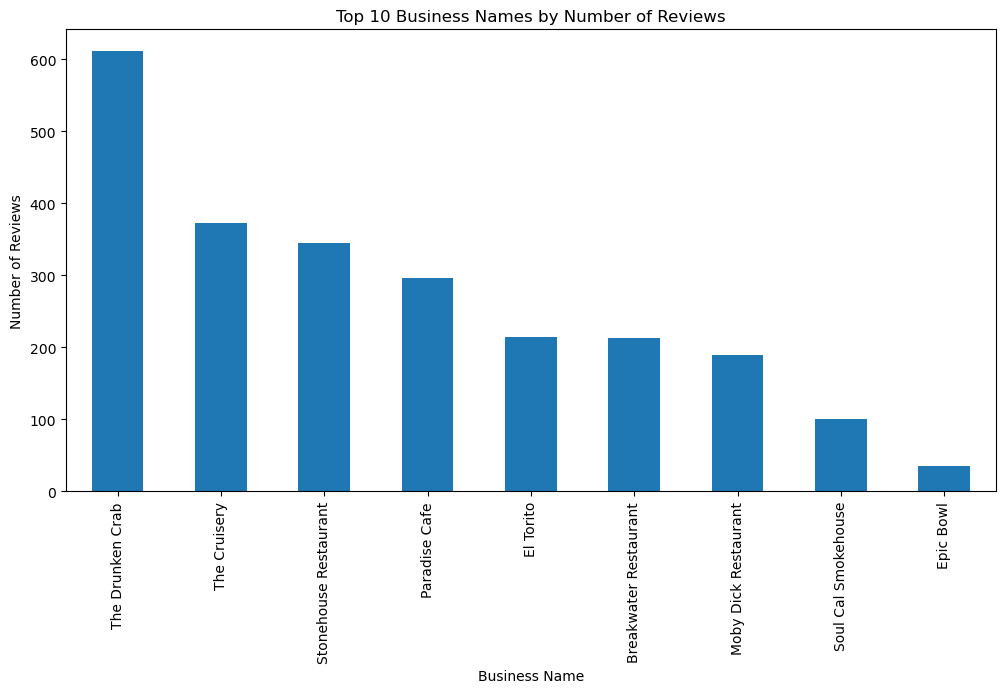

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import math

# Bar plot Top 10 business Names
plt.figure(figsize=(12, 6))
df_cleaned['business_name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Business Name')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Business Names by Number of Reviews')
plt.show()

We notice a high density of short reviews, that seem to hover around a 350 word count. Along with a long tail end for longer reviewer counts.

c:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


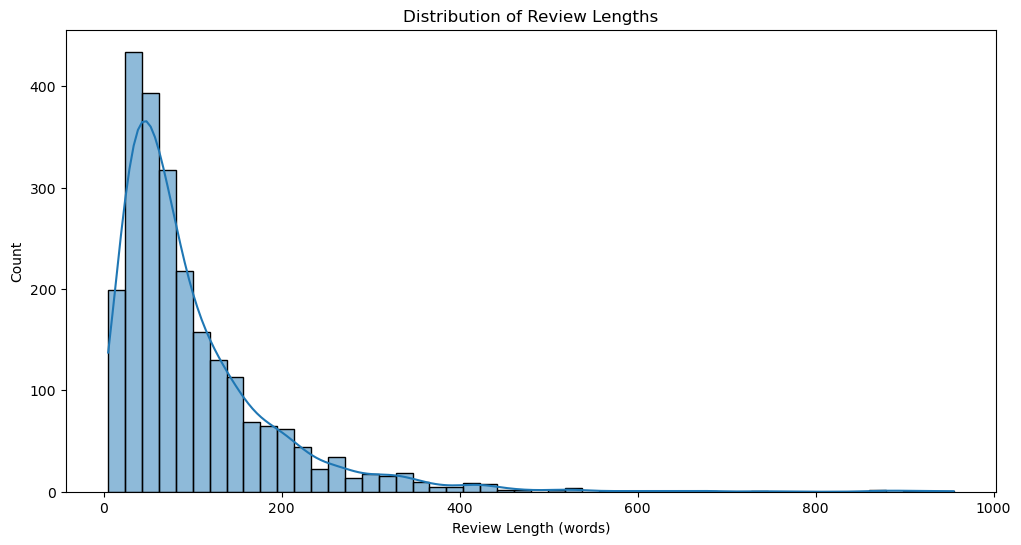

In [10]:
# Distribution of review lengths
df_cleaned['review_length'] = df_cleaned['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['review_length'], bins=50, kde=True)
plt.xlabel('Review Length (words)')
plt.title('Distribution of Review Lengths')
plt.show()

Since we want to explore specific categories there is an interest in experimenting with filtering and using those seeded terms we used for preprocessing in a processed state in our LDA. This allows us to provide context to our data for future analysis, specifically sentiment. The categories we filter inlcude the seed terms for food and service.

In [13]:
# Function to filter sentences by seed terms
def filter_by_seed_terms(df, seed_terms):
    filtered_rows = []
    for _, row in df.iterrows():
        if any(term in row['process_text'].lower() for term in seed_terms):
            filtered_rows.append(row)
    return pd.DataFrame(filtered_rows)

df_processed = df_chunks.copy()

# Filter sentences by food and service terms
df_food = filter_by_seed_terms(df_processed, seed_food_terms)
df_service = filter_by_seed_terms(df_processed, seed_service_terms)

# Custom stopwords based on results
food_stopwords = ['serve', 'come', 'time', 
                  'wait', 'start', 'start', 
                  'table', 'people', 'way', 
                  'star', 'place', 'restaurant']

service_stopwords = ['crab', 'dog', 'food', 'stonehouse' ,'restaurant']

# Tokenize and clean
def preprocess(text, custom_stopwords):
    # Combine gensim's default stopwords with custom stopwords
    stopwords = set(gensim.parsing.preprocessing.STOPWORDS).union(set(custom_stopwords))
    
    # Tokenize and remove stopwords
    return [token for token in simple_preprocess(text, deacc=True) if token not in stopwords]

# Process the categorized text data
processed_data_food = [preprocess(text, food_stopwords) for text in df_food['process_text'].values.tolist()]
processed_data_service = [preprocess(text, service_stopwords) for text in df_service['process_text'].values.tolist()]
processed_data_all = [preprocess(text, all_stopwords) for text in df_chunks['process_text'].values.tolist()]

# Dictionary and corpus for LDA
id2word_food = corpora.Dictionary(processed_data_food)
corpus_food = [id2word_food.doc2bow(text) for text in processed_data_food]

id2word_service = corpora.Dictionary(processed_data_service)
corpus_service = [id2word_service.doc2bow(text) for text in processed_data_service]

id2word_all = corpora.Dictionary(processed_data_all)
corpus_all = [id2word_all.doc2bow(text) for text in processed_data_all]

# Build LDA model for food and service
lda_model_food = gensim.models.ldamodel.LdaModel(corpus=corpus_food, id2word=id2word_food, num_topics=5, random_state=100, passes=10, alpha='auto')
lda_model_service = gensim.models.ldamodel.LdaModel(corpus=corpus_service, id2word=id2word_service, num_topics=5, random_state=100, passes=10, alpha='auto')
lda_model_all = gensim.models.ldamodel.LdaModel(corpus=corpus_all, id2word=id2word_all, num_topics=5, random_state=100, passes=10, alpha='auto')

In [14]:
# Visualize LDA topics
pyLDAvis.enable_notebook()
vis_all = gensimvis.prepare(lda_model_all, corpus_all, id2word_all)
pyLDAvis.display(vis_all)

Here we create a visual using pyLDAvis to manipulate our data in an interactive manner and understand some sentiments effective or good a food or service is within our topics.

In [15]:
# Visualize LDA topics
pyLDAvis.enable_notebook()
vis_service = gensimvis.prepare(lda_model_service, corpus_service, id2word_service)
pyLDAvis.display(vis_service)

In [16]:
# Visualize LDA topics
pyLDAvis.enable_notebook()
vis_food = gensimvis.prepare(lda_model_food, corpus_food, id2word_food)
pyLDAvis.display(vis_food)

Word clouds are a straighforward method to gather key words quickly for topics.

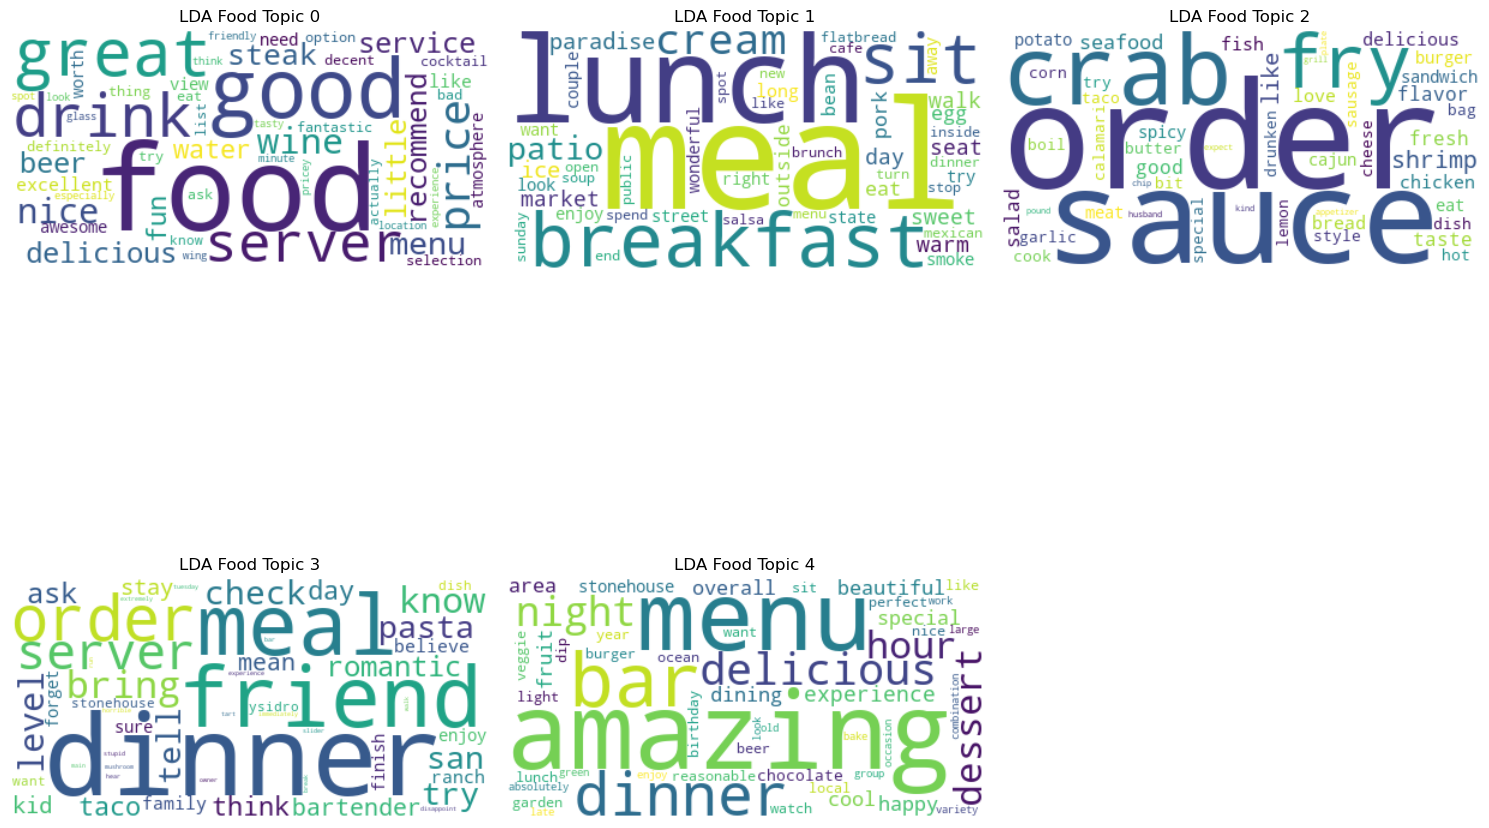

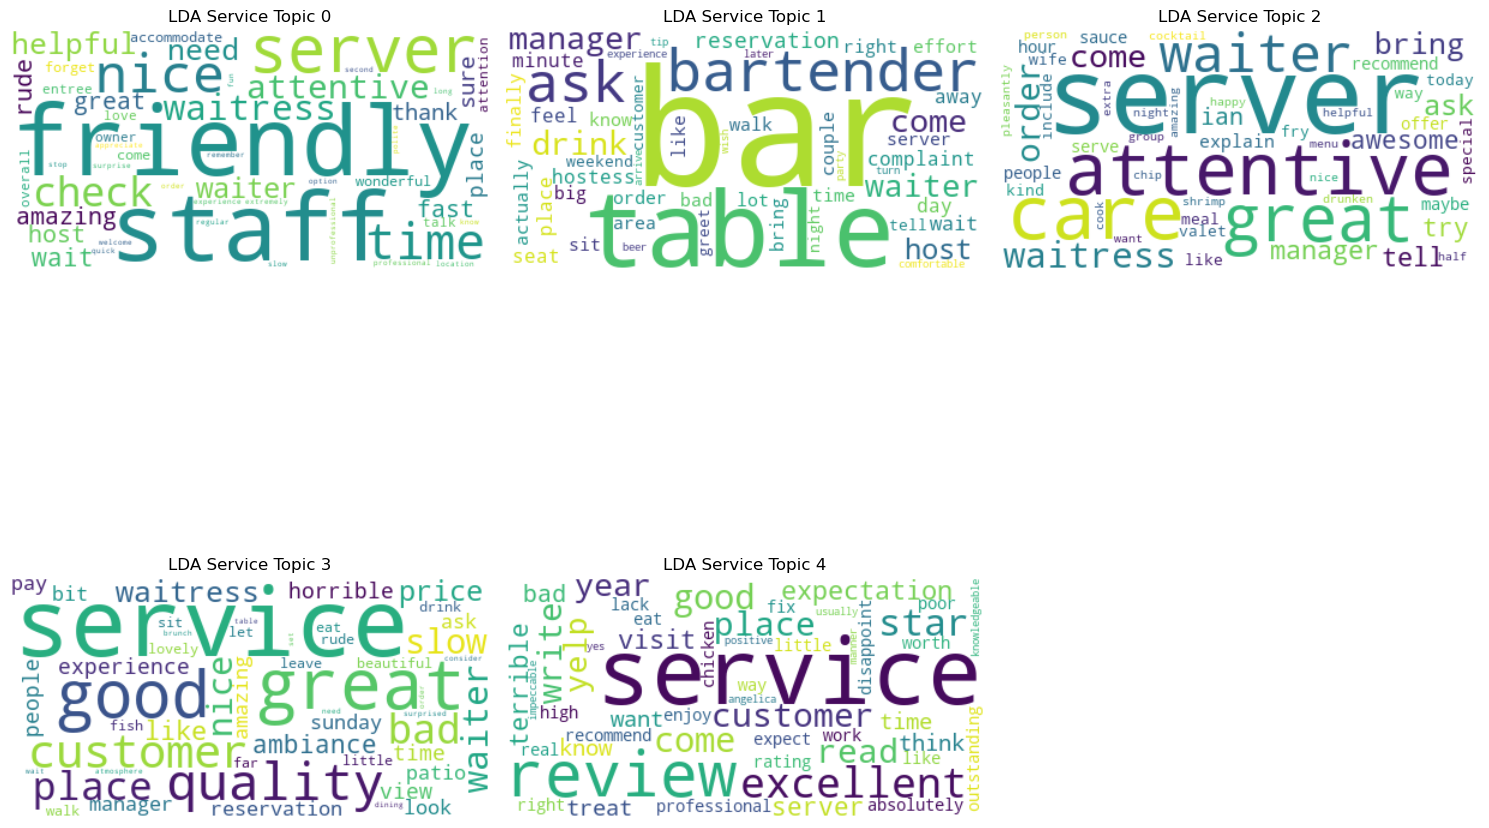

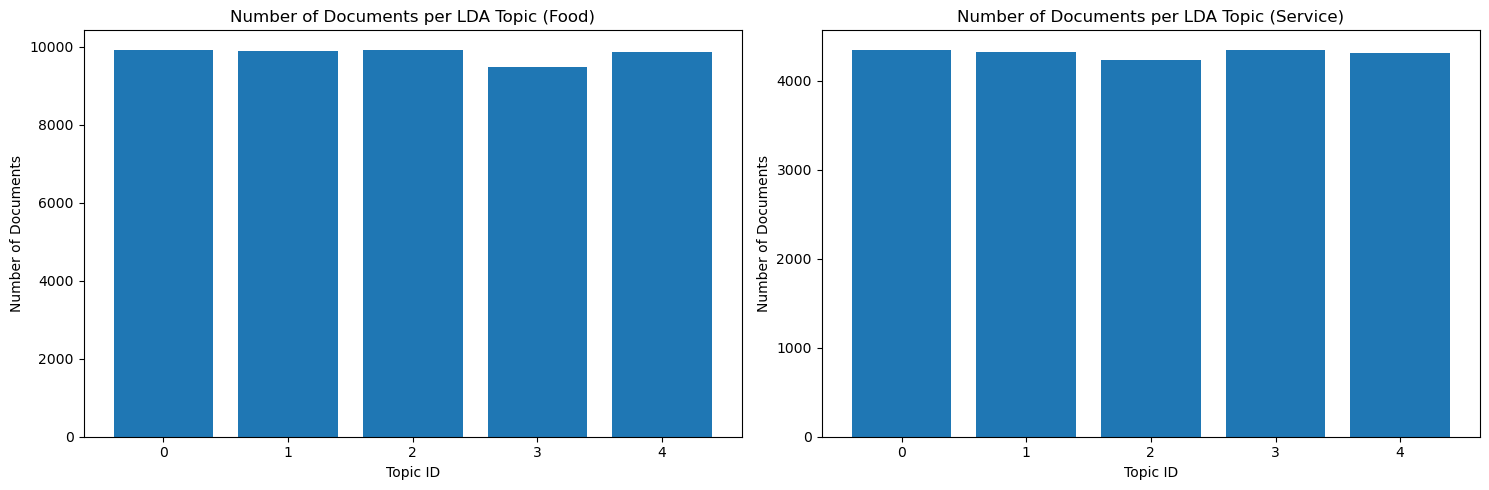

In [17]:
# Plots word clouds for the given LDA model topics as subplots
def plot_lda_word_clouds_subplots(lda_model, num_topics, title_prefix="LDA Topic"):
    cols = 3  # Number of columns
    rows = 2  # Number of rows

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for idx in range(num_topics):
        wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(lda_model.show_topic(idx, 50)))
        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].axis("off")
        axes[idx].set_title(f"{title_prefix} {idx}")

    # Remove any empty subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)
    plt.show()

# Plots bar charts for the topic distribution of the given LDA models as subplots
def plot_lda_topic_distribution_subplots(models, corpora, titles):
    num_plots = len(models)
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))
    
    for idx, (lda_model, corpus, title) in enumerate(zip(models, corpora, titles)):
        lda_topic_counts = [0] * lda_model.num_topics
        for doc in lda_model[corpus]:
            for topic_id, prob in doc:
                lda_topic_counts[topic_id] += 1
        
        axes[idx].bar(range(lda_model.num_topics), lda_topic_counts)
        axes[idx].set_xlabel('Topic ID')
        axes[idx].set_ylabel('Number of Documents')
        axes[idx].set_title(title)

    plt.tight_layout()
    
    plt.show()

# Example usage
plot_lda_word_clouds_subplots(lda_model_food, 5, "LDA Food Topic")
plot_lda_word_clouds_subplots(lda_model_service, 5, "LDA Service Topic")

plot_lda_topic_distribution_subplots(
    [lda_model_food, lda_model_service],
    [corpus_food, corpus_service],
    ["Number of Documents per LDA Topic (Food)", "Number of Documents per LDA Topic (Service)"]
)

With T-SNE it can be used to understand clustering within our data. As can be seeb through the visualizations most of our topics don't intervene with other except for topic 2 for food. Although, all clusters contain relatively similar shapes.

C:\Users\justi\AppData\Local\Temp\ipykernel_17704\1722124754.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_food[:, 0], tsne_food[:, 1], c=[np.argmax(x) for x in tsne_data_food], cmap=plt.cm.get_cmap('Spectral', 5))


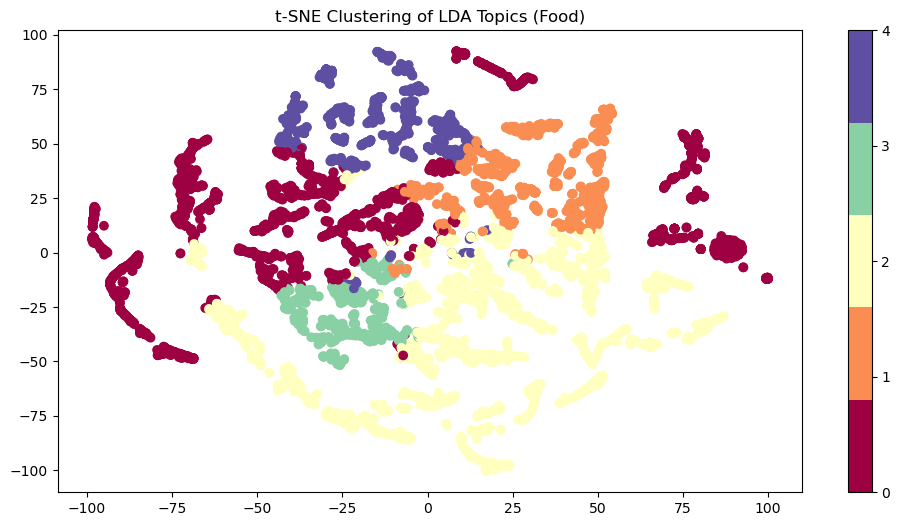

C:\Users\justi\AppData\Local\Temp\ipykernel_17704\1722124754.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_service[:, 0], tsne_service[:, 1], c=[np.argmax(x) for x in tsne_data_service], cmap=plt.cm.get_cmap('Spectral', 5))


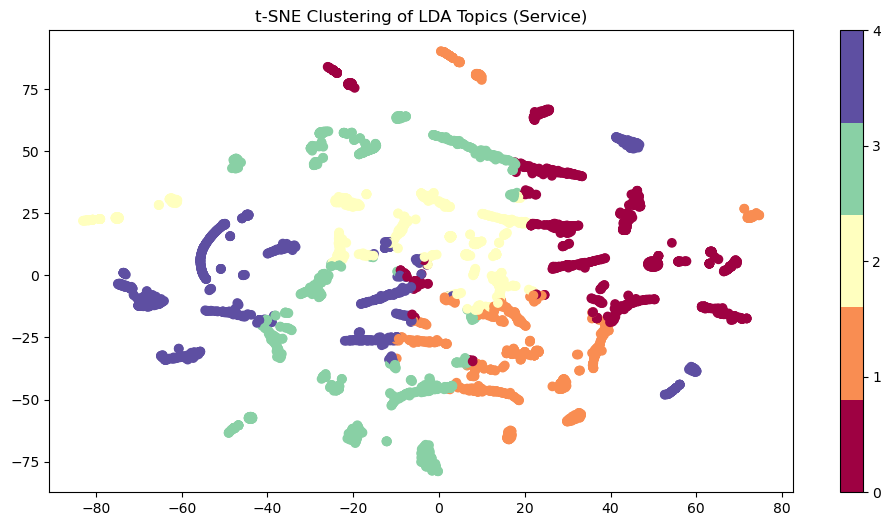

In [18]:
# Prepare data for t-SNE
def prepare_tsne_data(lda_model, corpus):
    topic_distributions = []
    for bow in corpus:
        topic_distribution = [0] * lda_model.num_topics
        for topic_id, prob in lda_model.get_document_topics(bow):
            topic_distribution[topic_id] = prob
        topic_distributions.append(topic_distribution)
    return np.array(topic_distributions)

tsne_data_food = prepare_tsne_data(lda_model_food, corpus_food)
tsne_data_service = prepare_tsne_data(lda_model_service, corpus_service)

# t-SNE for LDA topics
tsne_model_food = TSNE(n_components=2, random_state=0)
tsne_food = tsne_model_food.fit_transform(tsne_data_food)

tsne_model_service = TSNE(n_components=2, random_state=0)
tsne_service = tsne_model_service.fit_transform(tsne_data_service)

plt.figure(figsize=(12, 6))
plt.scatter(tsne_food[:, 0], tsne_food[:, 1], c=[np.argmax(x) for x in tsne_data_food], cmap=plt.cm.get_cmap('Spectral', 5))
plt.colorbar(ticks=range(5))
plt.title('t-SNE Clustering of LDA Topics (Food)')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(tsne_service[:, 0], tsne_service[:, 1], c=[np.argmax(x) for x in tsne_data_service], cmap=plt.cm.get_cmap('Spectral', 5))
plt.colorbar(ticks=range(5))
plt.title('t-SNE Clustering of LDA Topics (Service)')
plt.show()

Food Topics: The LDA model for food predominantly identifies topics around meals, drinks, seafood, etc. There is a clear emphasis on both the quality of food and the atmosphere.

Service Topics: The LDA model for service emphasizes staff interactions, efficiency, quality, and the process of managing dining experiences. The topics also highlight a mix of positive and negative feedback regarding service.

Topic Focuses for Food Category

In [19]:
for idx, topic in lda_model_food.print_topics(-1):
    print('Topic: {}: {}'.format(idx, topic))

Topic: 0: 0.122*"food" + 0.048*"good" + 0.044*"great" + 0.036*"drink" + 0.029*"server" + 0.018*"price" + 0.011*"wine" + 0.011*"nice" + 0.009*"menu" + 0.008*"steak"
Topic: 1: 0.019*"meal" + 0.018*"lunch" + 0.012*"breakfast" + 0.011*"sit" + 0.010*"cream" + 0.009*"patio" + 0.009*"paradise" + 0.009*"ice" + 0.008*"warm" + 0.008*"market"
Topic: 2: 0.030*"order" + 0.023*"sauce" + 0.019*"crab" + 0.018*"fry" + 0.017*"shrimp" + 0.016*"like" + 0.013*"seafood" + 0.012*"fresh" + 0.012*"flavor" + 0.012*"taste"
Topic: 3: 0.023*"dinner" + 0.012*"meal" + 0.012*"friend" + 0.010*"order" + 0.009*"server" + 0.008*"bring" + 0.007*"know" + 0.007*"level" + 0.006*"check" + 0.006*"san"
Topic: 4: 0.028*"amazing" + 0.023*"menu" + 0.017*"bar" + 0.016*"dinner" + 0.015*"delicious" + 0.013*"night" + 0.011*"hour" + 0.010*"dessert" + 0.009*"experience" + 0.009*"special"


Topic Focuses for Service Category

In [20]:
for idx, topic in lda_model_service.print_topics(-1):
    print('Topic: {}: {}'.format(idx, topic))

Topic: 0: 0.083*"friendly" + 0.079*"staff" + 0.032*"server" + 0.021*"nice" + 0.019*"time" + 0.017*"check" + 0.014*"waitress" + 0.013*"attentive" + 0.013*"helpful" + 0.013*"need"
Topic: 1: 0.034*"bar" + 0.019*"table" + 0.016*"bartender" + 0.015*"ask" + 0.014*"manager" + 0.014*"drink" + 0.014*"come" + 0.014*"waiter" + 0.012*"host" + 0.011*"reservation"
Topic: 2: 0.060*"server" + 0.023*"care" + 0.022*"attentive" + 0.018*"great" + 0.018*"waiter" + 0.017*"waitress" + 0.015*"order" + 0.014*"come" + 0.012*"bring" + 0.011*"ask"
Topic: 3: 0.090*"service" + 0.042*"great" + 0.036*"good" + 0.021*"quality" + 0.017*"customer" + 0.013*"bad" + 0.012*"place" + 0.010*"waiter" + 0.009*"nice" + 0.009*"slow"
Topic: 4: 0.119*"service" + 0.046*"review" + 0.017*"excellent" + 0.014*"star" + 0.012*"come" + 0.011*"good" + 0.011*"customer" + 0.011*"place" + 0.010*"read" + 0.010*"write"


# Section 5: Data Analysis and Discussion

## BERT Classification Model

Use BERT pre-trained models to classify the text into categories

1. Mapping: Encoding 0, 1, 2 respectively to food, service, and other catergory since BERT can only read integer value
2. Split data: Split labeled_df into 80 percent training and 20 percent validation
3. Examine: Checking if labeled_df is fullfilling the criterias requirement to train on BERT
4. DataLoader: Helps simplifies the process of batching and shuffling data (Improvement: Combine DataLoader with K-fold cross-validation to provides a robust estimate of model performance)
5. BERT Pre-Train model implementation: This pre-train model learn to classify text into different categories based of the sample_df

### Mapping

In [112]:
# Load sample_data consist of category column with labeled
labeled_df = pd.read_csv('sampled_data.csv')

# Encode lables
label_mapping = {'food': 0, 'service': 1, 'other': 2}
labeled_df['category'] = labeled_df['category'].map(label_mapping)
labeled_df.head(20)

,business_name,overall_score,review_id,review_score,text,weight_sentence,category
0,The Drunken Crab,4.0,mOdhuY-rqgGyaP3d8ZDOTw,1,mussels did not look like it is a pound.,0.147541,0.0
1,The Drunken Crab,4.0,X0B9MKygVBXjlt9OjFPOJA,4,skip the oily mess in the plastic bag!,0.571429,2.0
2,El Torito,2.5,MztLQL37ilLFpzgasL_szQ,5,came in for drinks and had really great michel...,0.562500,0.0
3,The Drunken Crab,4.0,aIxnm6VYqYlF5i6jBHmSNQ,4,corn and potatoes were cooked just right and s...,0.139535,0.0
4,Stonehouse Restaurant,4.5,KRDe6PNKhPACeVACRNgSNg,5,my recommendation: steak diane!,0.041667,0.0
5,Paradise Cafe,3.5,U8dsw2w96uSDNLMpKIPA-A,4,artichokes grow like weeds around here.,0.139535,NaN
6,El Torito,2.5,bw2Oe_3UhQgy7qvFFId6Jw,3,this place has been here for at least 7 years ...,0.437500,1.0
7,Stonehouse Restaurant,4.5,UjABz1dSTJxSkeVPJpXYfQ,5,so thankful we chose the stonehouse to celebra...,0.121951,NaN
8,Stonehouse Restaurant,4.5,6sUO4poSzs-zi2gb4npzhQ,5,food was amazing.,0.150000,0.0
9,Moby Dick Restaurant,3.0,PwVNCwtSw9mFdiagCFJD6g,1,"to show you how bad the waiter was , when he k...",0.181034,1.0


### Split Data

Split the dataset into training and validation sets. Included labeled_df['text'].tolist() which converts the 'text' column into a list that is use for training and validation. In addition, labeled_df['category'].tolist() this converts the 'category' column into a list which contains the labels corresponding to the text data.

In [114]:
# After loading the sample_df row 5 and 7 display NaN so we change it back to it destinated category
# Replace Na
index_nan1 = 5
index_nan2 = 7
column_name = 'category'

labeled_df.at[index_nan1, column_name] = 2
labeled_df.at[index_nan2, column_name] = 1
rows_with_na = labeled_df[labeled_df.isna().any(axis=1)]
print(rows_with_na)

Empty DataFrame
Columns: [business_name, overall_score, review_id, review_score, text, weight_sentence, category]
Index: []


In [115]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    labeled_df['text'].tolist(), labeled_df['category'].tolist(), test_size=0.2, random_state=42
)

# Check lengths of the splits
print(f'Training texts: {len(train_texts)}, Training labels: {len(train_labels)}')
print(f'Validation texts: {len(val_texts)}, Validation labels: {len(val_labels)}')

Training texts: 1600, Training labels: 1600
Validation texts: 400, Validation labels: 400


### Examine

Criteria for training BERT

*   No Nan

*   A good amount data from each category

*   No duplicate

In [116]:
labeled_df.shape

(2000, 7)

In [117]:
# After loading the sample_df into mapping the data type of category change to float so we need to change it back to integer
labeled_df['category'] = labeled_df['category'].astype(int)
labeled_df.dtypes

business_name       object
overall_score      float64
review_id           object
review_score         int64
text                object
weight_sentence    float64
category             int32
dtype: object

In [118]:
# Checking the proportion of labeled data so it consistent with each other
# Filter the DataFrame for categories 0, 1, and 2
filtered_df = labeled_df[labeled_df['category'].isin([0, 1, 2])]

# Count the total of each label within these categories
label_counts = filtered_df['category'].value_counts()

# Display the results
print(label_counts)

category
0    842
2    624
1    534
Name: count, dtype: int64


In [119]:
duplicates = df_chunks.duplicated()

duplicate_rows = df_chunks[duplicates]

print(duplicate_rows)

              business_name  overall_score               review_id  \
983   Stonehouse Restaurant            4.5  ApVMX3f3IanrF_G-H9ilWA   
2180              El Torito            2.5  As8IyY5aYHQuc-ktMaM1Fw   
1328  Stonehouse Restaurant            4.5  KIak_oVpycqa7Jp32IXnTQ   
2234   Moby Dick Restaurant            3.0  PwVNCwtSw9mFdiagCFJD6g   
2234   Moby Dick Restaurant            3.0  PwVNCwtSw9mFdiagCFJD6g   
2234   Moby Dick Restaurant            3.0  PwVNCwtSw9mFdiagCFJD6g   
223           Paradise Cafe            3.5  QDrVob__ryYxqM0QxrLgPQ   
217            The Cruisery            4.0  SFfqhxDfpZml61GXjY8Pdg   
1977              El Torito            4.0  TN1geaU2Sry_NfpXk-kbpA   
1484       The Drunken Crab            4.0  WeSJL-5gdUhDapuqAL5BdA   
185           Paradise Cafe            3.5  ejBZ8e2BAcejin4-Hiu7Ew   
1404       The Drunken Crab            4.0  f8fE5mNdSuEZHqDW-_vkQw   
1404       The Drunken Crab            4.0  f8fE5mNdSuEZHqDW-_vkQw   
1620       The Drunk

In [120]:
df_chunkv2 = df_chunks.drop_duplicates()
df_chunkv2.shape

(20057, 7)

### Dataloader
Purpose:

*   Efficiently handles data loading and batching
*   Faciliates shuffling and parallel data loading
*   Used during training and evaluation to iterate over batches of data

**Improvement**: Combine with K-Fold Cross-Validation to provides a robust estimate of model performance

In [121]:
def preprocess_text(text):
    # Check if text is a string (not NaN)
    if isinstance(text, str):
        # Remove HTML tags using BeautifulSoup
        text = BeautifulSoup(text, "html.parser").get_text()

        # Remove special characters and punctuation using regex
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        # Remove emoji
        text = emoji.replace_emoji(text, replace='')

        # Remove single characters
        text = re.sub(r'\b\w\b', '', text)

        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()

        # Convert to lowercase and tokenize
        words = word_tokenize(text.lower())

        # Remove stop words
        stop_words = set(all_stopwords)
        filtered_words = [word for word in words if word not in stop_words]

        # Remove words that are 2 characters or less
        filtered_words = [word for word in filtered_words if len(word) > 2]

        # Join filtered words into a single string for spaCy processing
        filtered_comment = ' '.join(filtered_words)

        # Lemmatize the text using spaCy
        doc = nlp(filtered_comment)
        lemmatized_text = ' '.join([token.lemma_ for token in doc])

        # Join the lemmatized words back into a single string
        processed_comment = lemmatized_text
    else:
        processed_comment = ""

    return processed_comment

In [122]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
from torch.utils.data import DataLoader, DataChunk, Dataset
import torch

# Create DataLoaders
class TextDataset(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: (val[idx]) for key, val in self.encodings.items()}
    item['labels'] = (self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

- train_encodings and val_encodings help to converts raw text into tokenized format that is suitable for a model
- train_labels and val_labels converts the lists of labels for the training and validation sets into PyTorch tensors, which are necessary for model training in PyTorc

In [126]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenize the training and validation texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128, return_tensors='pt')
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128, return_tensors='pt')

# Convert labels to tensors
# Convert labels to tensors with dtype torch.long
train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)

# Check the lengths of the encodings and labels to ensure consistency
print(f'Training encodings: {len(train_encodings["input_ids"])}, Training labels: {len(train_labels)}')
print(f'Validation encodings: {len(val_encodings["input_ids"])}, Validation labels: {len(val_labels)}')

Training encodings: 1600, Training labels: 1600
Validation encodings: 400, Validation labels: 400


- TextDataset used in train_dataset and val_dataset is a custome dataset class above that takes in the tokenized encoding and corresponding labels

- DataLoader used in train_dataloader and val_dataloader is a PyTorch utility that provides an iterable over a dataset with support for batching, shuffling, and parallel loading.

In [127]:
# Create TextDataset instances for training and validation sets
train_dataset = TextDataset(train_encodings, train_labels)
val_dataset = TextDataset(val_encodings, val_labels)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = 16, shuffle = False )

### BERT Pre-Train model implementation

BERT training loops:

1.   For each epoch, iterate over batches of data from dataloader
2.   Perform forward and backward passes to compute and apply gradients
3.   Print progress after each epoch

Experience:
- Initially, we trained the model without using the preprocess dataframe and updating the train model condition to focus handling the batch. Training took 15hrs
- After using preprocess dataframe with stopword and updating the training model. Training took 4hrs
- Using the same updates with different runtime type in google colab of CPU to T4 GPU. Training took 2 minutes
- However, if we running T4 GPU we running into the risk of crash more often than using the regular version CPU
- (8/2/2024): after I splited the data into training and valdidation set the processing time of BERT took longer than expected.

In [128]:
# Fine-tune BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 3)
optimizer = torch.optim.AdamW(model.parameters(), lr = 5e-5)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

model.train()
for epoch in range(3):
  total_loss = 0
  for batch in train_dataloader:
    optimizer.zero_grad()
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    # Forward pass
    outputs = model(input_ids, attention_mask = attention_mask, labels = labels)
    loss = outputs.loss
    total_loss += loss.item()

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

  avg_loss = total_loss / len(train_dataloader)
  print(f'Epoch {epoch + 1} complete')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 complete
Epoch 2 complete
Epoch 3 complete


In [129]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to classify texts in batches
def classify_texts(texts, batch_size=32):
    predictions = []
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i+batch_size]
            inputs = tokenizer(batch_texts, return_tensors='pt', truncation=True, padding=True, max_length=128).to(device)
            outputs = model(**inputs)
            batch_predictions = outputs.logits.argmax(dim=-1).cpu().numpy()
            predictions.extend(batch_predictions)
    return predictions

train_predicted_labels = classify_texts(train_texts)

# Calculate confusion matrix and classification report for training set
train_cm = confusion_matrix(train_labels, train_predicted_labels)
train_report = classification_report(train_labels, train_predicted_labels, target_names=['food', 'service', 'other'])

print("Training Set Confusion Matrix:")
print(train_cm)
print("\nTraining Set Classification Report:")
print(train_report)


val_predicted_labels = classify_texts(val_texts)

# Calcualte confusion matrix and classification report
cm = confusion_matrix(val_labels, val_predicted_labels)
report = classification_report(val_labels, val_predicted_labels, target_names = ['food', 'service', 'other'])

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Training Set Confusion Matrix:
[[671   0   4]
 [  2 428   8]
 [ 16  17 454]]

Training Set Classification Report:
              precision    recall  f1-score   support

        food       0.97      0.99      0.98       675
     service       0.96      0.98      0.97       438
       other       0.97      0.93      0.95       487

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600

Confusion Matrix:
[[152   2  13]
 [ 10  74  12]
 [ 18  30  89]]

Classification Report:
              precision    recall  f1-score   support

        food       0.84      0.91      0.88       167
     service       0.70      0.77      0.73        96
       other       0.78      0.65      0.71       137

    accuracy                           0.79       400
   macro avg       0.77      0.78      0.77       400
weighted avg       0.79      0.79      0.78       400



In [139]:
# Apply the classify_texts function to the DataFrame
texts_to_classify = df_chunkv2['process_text'].tolist()
predicted_labels = classify_texts(texts_to_classify)

predicted_df = df_chunkv2
predicted_df['category'] = predicted_labels

predicted_df.head(10)

C:\Users\justi\AppData\Local\Temp\ipykernel_17704\3870531619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_df['category'] = predicted_labels


,business_name,overall_score,review_id,review_score,text,weight_sentence,process_text,category
664,The Cruisery,4.0,--ZJoZprz2kblpAg_ORC8A,5.0,first time visit yesterday and had a great bri...,0.342857,time visit yesterday great brie chicken sandwich,0
664,The Cruisery,4.0,--ZJoZprz2kblpAg_ORC8A,5.0,ali our server was great and took us through a...,0.657143,ali server great take,1
664,The Cruisery,4.0,--ZJoZprz2kblpAg_ORC8A,5.0,menu items that we will have to try during our...,0.657143,menu item try visit,0
25,Paradise Cafe,3.5,-1u0FfvpsDOvqMrzu4OQmQ,5.0,one of our favorite local places as locals.,0.242424,favorite local place local,2
25,Paradise Cafe,3.5,-1u0FfvpsDOvqMrzu4OQmQ,5.0,"food is consistently good, and they all work a...",0.333333,food consistently good work team,0
25,Paradise Cafe,3.5,-1u0FfvpsDOvqMrzu4OQmQ,5.0,bruce in the bar is amazing .,0.181818,bruce bar amazing,2
25,Paradise Cafe,3.5,-1u0FfvpsDOvqMrzu4OQmQ,5.0,a must to try when visiting santa barbara!,0.242424,try visit,2
720,Soul Cal Smokehouse,3.5,-6f51mMjm0FlZdu5Pwp8qA,4.0,i had the pork belly and the brisket with frie...,0.094488,pork belly brisket fry bean,0
720,Soul Cal Smokehouse,3.5,-6f51mMjm0FlZdu5Pwp8qA,4.0,my husband had the sampler.,0.039370,husband sampler,0
720,Soul Cal Smokehouse,3.5,-6f51mMjm0FlZdu5Pwp8qA,4.0,the meat is amazing!,0.031496,meat amazing,0


In [140]:
# Filter the DataFrame for categories 0, 1, and 2
filtered_df = predicted_df[predicted_df['category'].isin([0, 1, 2])]

# Count the total of each label within these categories
label_counts = filtered_df['category'].value_counts()

# Display the results
print(label_counts)

category
0    10155
1     5054
2     4848
Name: count, dtype: int64


In [141]:
backup_ = filtered_df.copy()

## Sentiment Analysis

### Previous POS Exploration

## Previous POS Exploration

We took a deep look into the relationship between POS and Sentiment scores. However, we ran out of time before we could get deeper insights from it and left it out of the original presentation. We've included it in this submission because it was very interesting.

First we created two df's for exploration of separate groupings of review data

In [ ]:
# Create review_df
review_df = df_reviews.drop(columns=['business_name', 'overall_score', 'review_id'])

# Create sentence_df
sentence_df = df_sentences.drop(columns=['business_name', 'overall_score', 
                                         'weight_sentence', 'review_score'])
sentence_df.head()

,review_id,text
664,--ZJoZprz2kblpAg_ORC8A,first time visit yesterday and had a great bri...
664,--ZJoZprz2kblpAg_ORC8A,ali our server was great and took us through a...
25,-1u0FfvpsDOvqMrzu4OQmQ,one of our favorite local places as locals.
25,-1u0FfvpsDOvqMrzu4OQmQ,"food is consistently good, and they all work a..."
25,-1u0FfvpsDOvqMrzu4OQmQ,bruce in the bar is amazing.


### Deriving Variables

The first thing we do is explore the POS tags for the df's and get a frequency count for each to see what kind of impact they may have on the score. We also run a sentiment analysis for each level to generate metrics based on both TextBlob and VADER to determine which method offers better insight.

In [ ]:
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define the function to calculate sentiment scores using VADER and TextBlob
def get_sentiment_scores(text):
    # VADER scores
    vader_scores = sia.polarity_scores(text)
    # TextBlob scores
    blob = TextBlob(text)
    textblob_scores = {
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity
    }
    # Combine scores
    combined_scores = {
        'vader_pos': vader_scores['pos'],
        'vader_neg': vader_scores['neg'],
        'vader_neu': vader_scores['neu'],
        'vader_compound': vader_scores['compound'],
        'textblob_polarity': textblob_scores['polarity'],
        'textblob_subjectivity': textblob_scores['subjectivity']
    }
    return combined_scores

# Function to preprocess text (lowercase and remove punctuation)
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Function to extract dependencies from text
def extract_dependencies(text):
    doc = nlp(text)
    return [(token.text, token.dep_) for token in doc]

# Function to count tags
def count_tags(tag_list):
    return dict(Counter(tag_list))

# Function to preprocess DataFrame for analysis
def preprocess_for_analysis(df, tag_column):
    # Preprocess text data
    df['text'] = df['text'].apply(preprocess_text)
    
    # Count tag frequencies
    df['counts'] = df[tag_column].apply(count_tags)
    
    # Flatten the tag counts into individual columns
    df_tags = df['counts'].apply(pd.Series).fillna(0)
    
    # Concatenate tag counts with the original DataFrame
    df_analysis = pd.concat([df, df_tags], axis=1)
    
    # Define numeric columns (including tag counts and sentiment scores)
    numeric_columns = df_analysis.select_dtypes(include=[float, int]).columns
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Standardize the numeric columns
    df_analysis[numeric_columns] = scaler.fit_transform(df_analysis[numeric_columns])
    
    # Calculate Z-scores for numeric columns
    z_scores = np.abs(stats.zscore(df_analysis[numeric_columns]))
    
    # Remove rows with Z-scores greater than 3
    df_analysis = df_analysis[(z_scores < 3).all(axis=1)]
    
    return df_analysis

# Function to process text data
def process_text_data(df):
    # Preprocess text data
    df['text'] = df['text'].apply(preprocess_text)
    
    # Extract dependencies
    df['dep_tags'] = df['text'].apply(extract_dependencies)
    
    # Apply sentiment analysis
    sentiment_scores = df['text'].apply(get_sentiment_scores)
    sentiment_df = sentiment_scores.apply(pd.Series)
    df = pd.concat([df, sentiment_df], axis=1)
    
    return df

# Function to process tags and calculate sentiment
def process_tags_and_sentiment(tag_list):
    # Flatten the list of tags
    flattened_tags = [item for sublist in tag_list for item in sublist]
    
    # Create a DataFrame with unique words as the index and their tags as columns
    tags_df = pd.DataFrame(flattened_tags, columns=['word', 'tag']).drop_duplicates().set_index('word')
    
    # Apply sentiment analysis to each word
    tags_df['sentiment_scores'] = tags_df.index.to_series().apply(get_sentiment_scores)
    
    # Split the sentiment scores into separate columns
    sentiment_scores_df = tags_df['sentiment_scores'].apply(pd.Series)
    
    # Concatenate the sentiment scores with tags_df
    tags_df = pd.concat([tags_df, sentiment_scores_df], axis=1).drop(columns=['sentiment_scores'])
    
    return tags_df

# Function to normalize and plot sentiment scores
def normalize_and_plot(tags_df, tag_column):
    # Filter the DataFrame to exclude specified tags
    exclude_tags = ['INTJ', 'NUM', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'X']
    filtered_tags_df = tags_df[~tags_df[tag_column].isin(exclude_tags)]
    
    # Group by tags and calculate mean sentiment scores
    grouped_tags = filtered_tags_df.groupby(tag_column).mean()
    
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(grouped_tags.values)
    
    # Convert the normalized data back to a DataFrame
    normalized_means_df = pd.DataFrame(normalized_data, index=grouped_tags.index, columns=grouped_tags.columns)
    
    # Plot the mean sentiment scores for each tag
    fig, axes = plt.subplots(len(normalized_means_df.columns), 1, figsize=(14, len(normalized_means_df.columns) * 4))
    
    for i, column in enumerate(normalized_means_df.columns):
        sns.barplot(x=normalized_means_df.index, y=normalized_means_df[column], ax=axes[i], palette="viridis")
        axes[i].set_title(f'Mean {column} by {tag_column}', fontsize=16)
        axes[i].set_xlabel(f'{tag_column}', fontsize=14)
        axes[i].set_ylabel(f'Mean {column}', fontsize=14)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
    plt.tight_layout()
    plt.show()

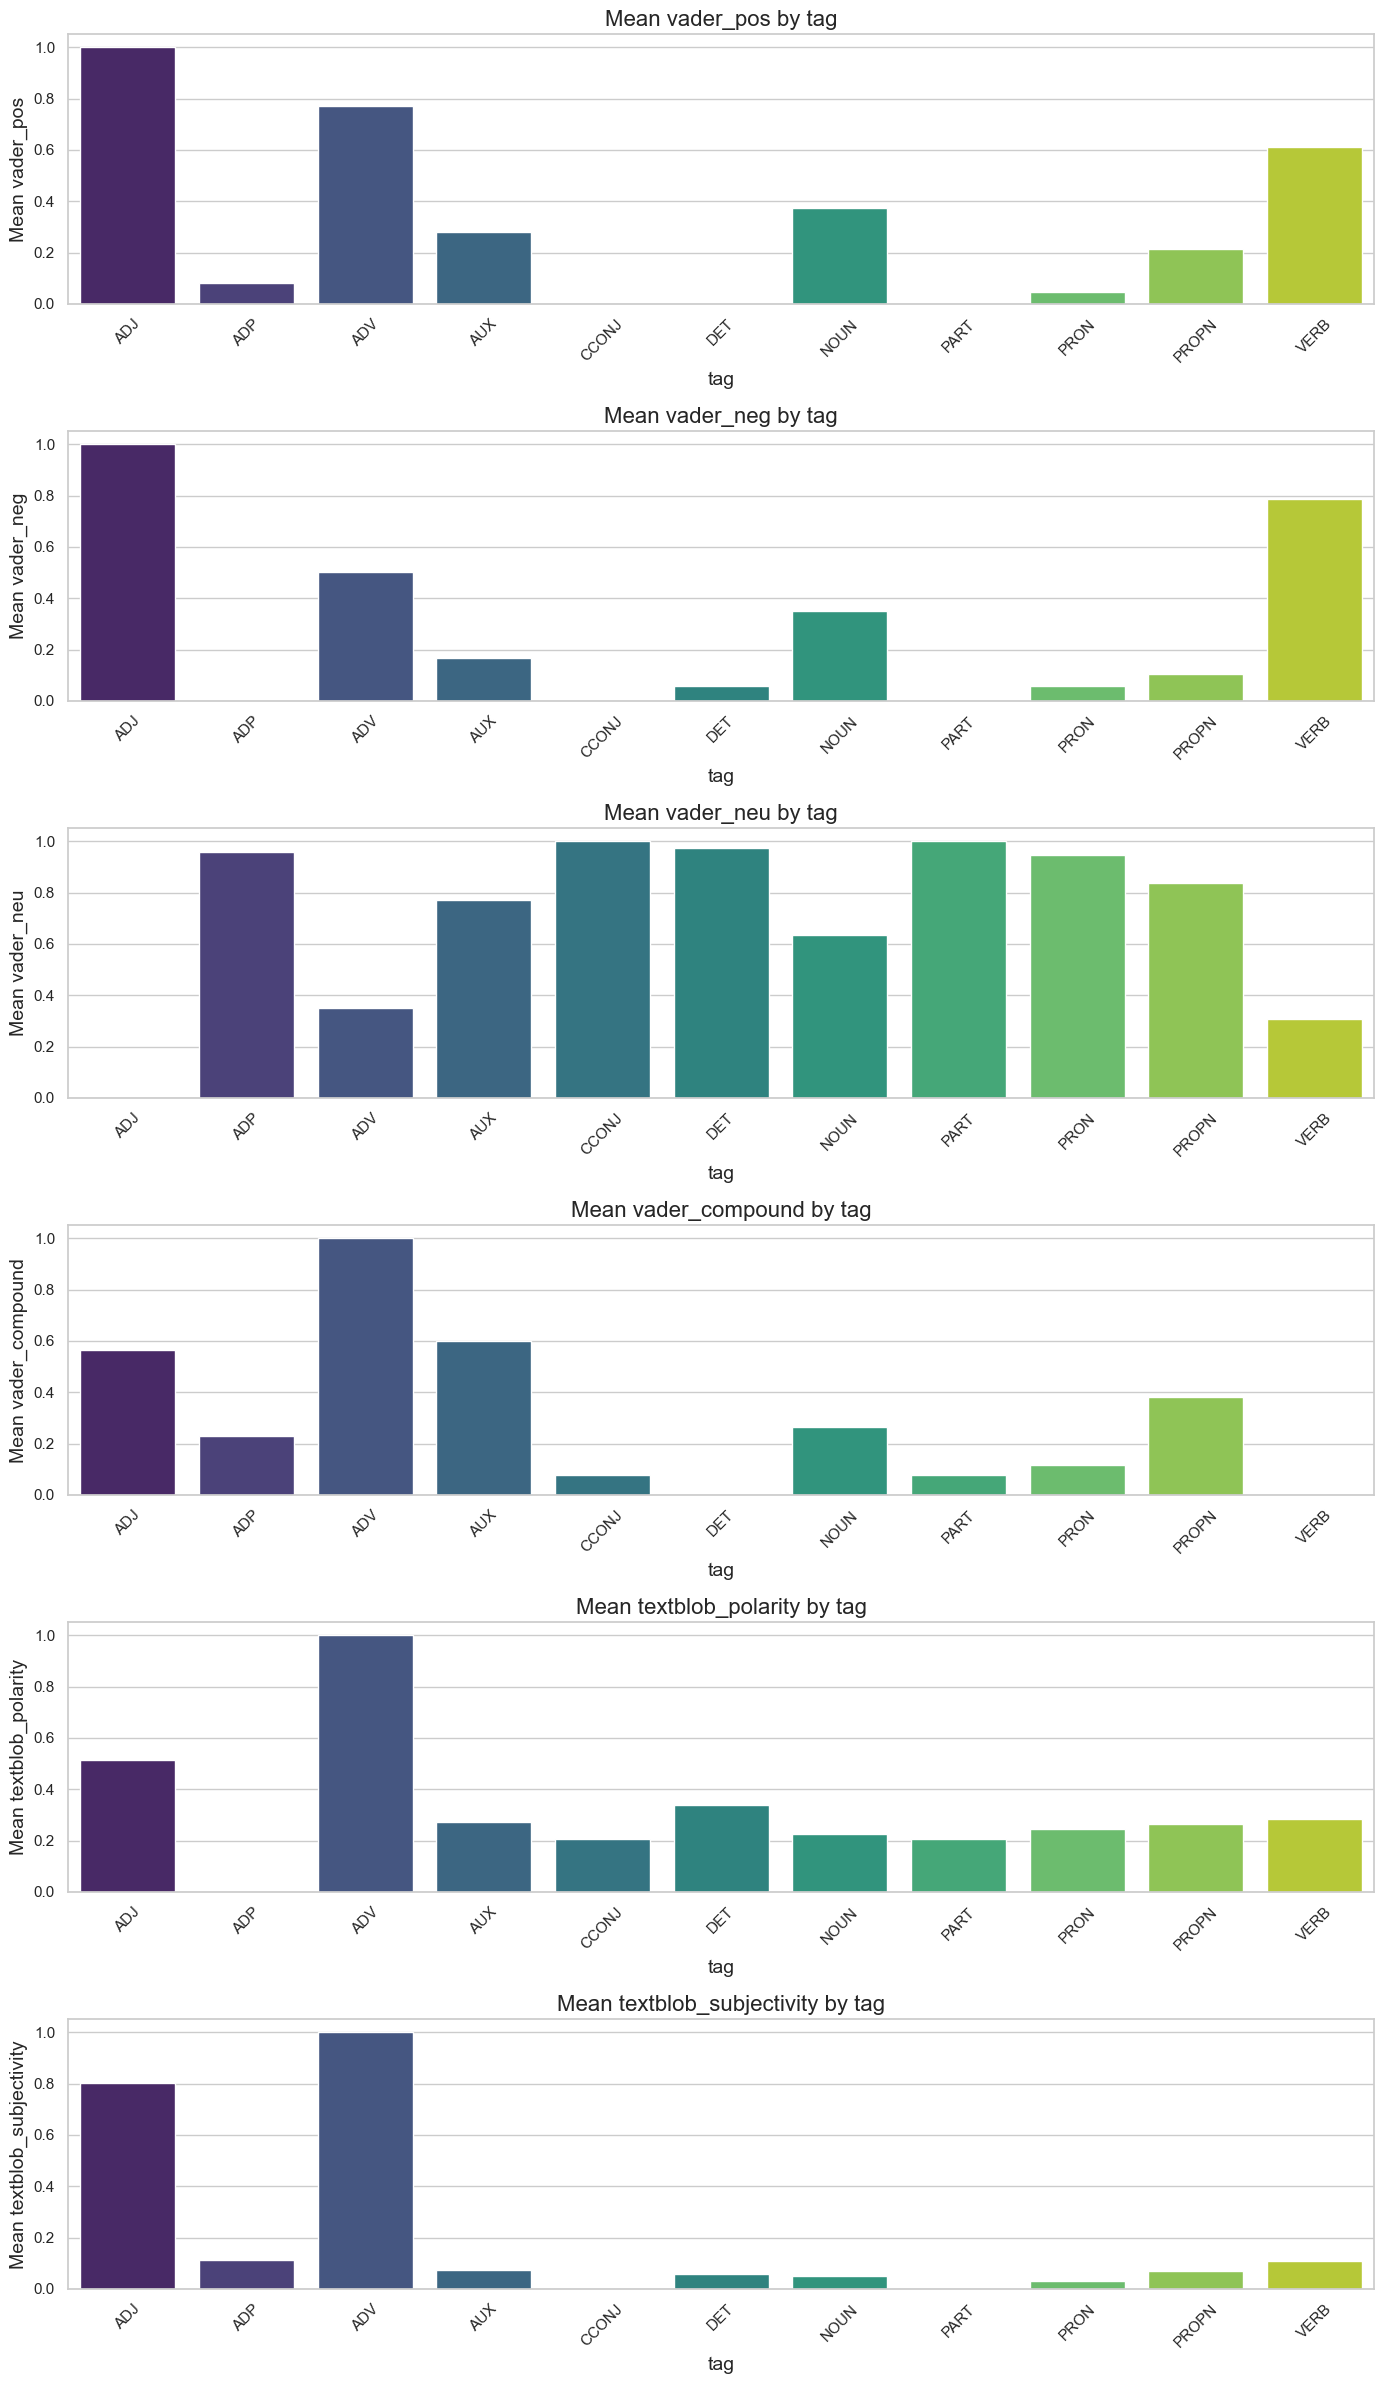

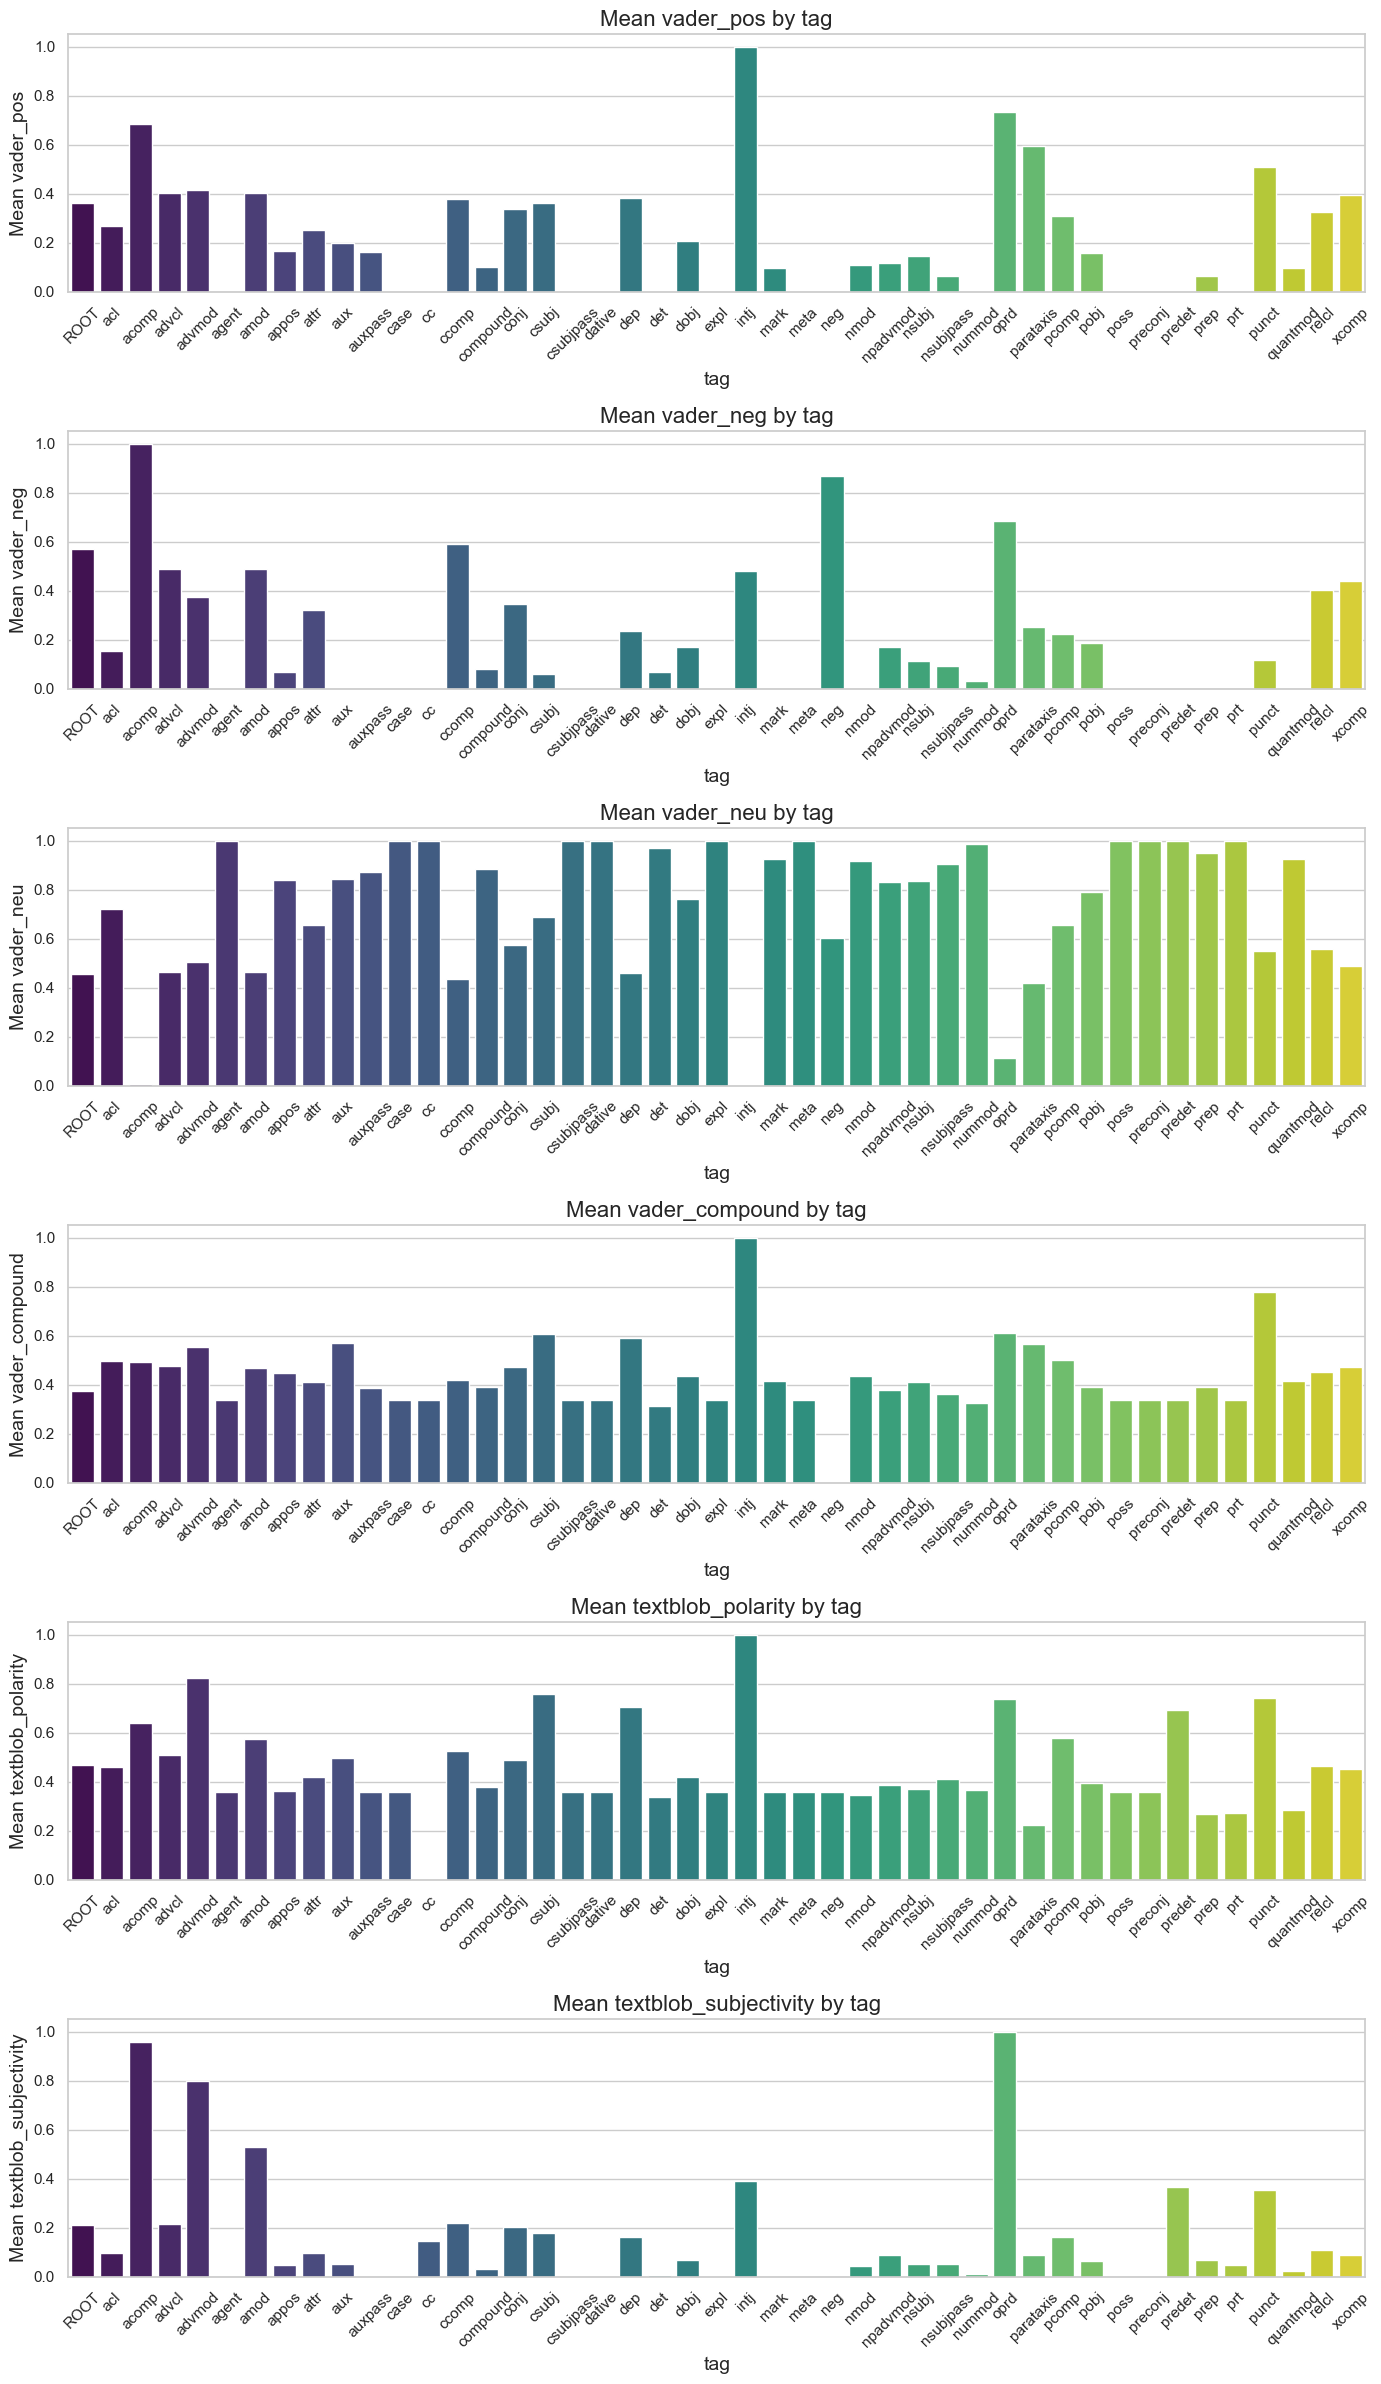

In [ ]:
# Process the DataFrames
review_df = process_text_data(review_df)
sentence_df = process_text_data(sentence_df)

# Apply the analysis preprocessing function
review_analysis = preprocess_for_analysis(review_df, 'tags')
sentence_analysis = preprocess_for_analysis(sentence_df, 'tags')

# Process and plot POS tags
pos_tags_df = process_tags_and_sentiment(review_df['tags'])
normalize_and_plot(pos_tags_df, 'tag')

# Process and plot dependency tags
dep_tags_df = process_tags_and_sentiment(sentence_df['dep_tags'])
normalize_and_plot(dep_tags_df, 'tag')

### Score Adjustment Calculations

After careful consideration and comparison, we chose to use VADER for our sentiment analysis since the compound score captured better sentiment across phrases than the polarity score from TextBlob. We investigated the use of a combination of Compound from VADER and Subjectivity from TextBlob but due to time constraints, couldn't proceed down that route. In the future, we'd like to pursure a deeper analysis on this and try to train a recurrent neural network to better identify and measure sentiment.

At this stage, we implement two functions, one to normalize our calculated score metrics, and another to adjust the review score in proportion to the category score. We also have a function to simplify our sentiment application and allow for easy altering in the future.

In [142]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis and return all scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Function to normalize a series to the 1-5 range
def normalize(series):
    min_val = series.min()
    max_val = series.max()
    normalized_series = 1 + (series - min_val) * 4 / (max_val - min_val)
    return normalized_series

# Function to combine overall score with normalized sentiment-adjusted score
def combine_scores(overall, review):
    combined = (overall + review) / 2
    return max(1, min(5, combined))

We apply the sentiment analysis to the processed text and only retain the compound score for use. We add an additional stage to map the encoded BERT category to their appropriate classification term. Our final process in this chunk is to remove all the neutral rows in our dataset. Neutral text has no impact on the sentiment of the review and thus aren't necessary for further processing stages. 

In [143]:
# Assuming df_chunks is the DataFrame with reviews
#predicted_df['process_text'] = predicted_df['process_text'].astype(str)

# Create a mapping dictionary
category_mapping = {0: 'food', 1: 'service', 2: 'other'}

# Map the integer values in the 'category' column to strings
filtered_df['category'] = filtered_df['category'].map(category_mapping)

# Apply sentiment analysis and store all scores in separate columns
sentiment_scores = filtered_df['process_text'].apply(get_sentiment_scores).apply(pd.Series)
predicted_df = pd.concat([filtered_df, sentiment_scores], axis=1)

# Drop unnecessary columns and filter out rows with zero compound score
predicted_df.drop(columns=['overall_score', 'text', 'neg', 'neu', 'pos'], inplace=True)
predicted_df = predicted_df[predicted_df['compound'] != 0.0]
predicted_df.head()

,business_name,review_id,review_score,weight_sentence,process_text,category,compound
664,The Cruisery,--ZJoZprz2kblpAg_ORC8A,5.0,0.342857,time visit yesterday great brie chicken sandwich,food,0.6249
664,The Cruisery,--ZJoZprz2kblpAg_ORC8A,5.0,0.657143,ali server great take,service,0.6249
25,Paradise Cafe,-1u0FfvpsDOvqMrzu4OQmQ,5.0,0.242424,favorite local place local,other,0.4588
25,Paradise Cafe,-1u0FfvpsDOvqMrzu4OQmQ,5.0,0.333333,food consistently good work team,food,0.4404
25,Paradise Cafe,-1u0FfvpsDOvqMrzu4OQmQ,5.0,0.181818,bruce bar amazing,other,0.5859


Our next stage is so convert the compound sentiment scores from VADER into representative values based on the weighted impact each piece has on the overall review. This is also the first stage where we are able to split the sentiment scores into their respective categories. 

Since we've removed the neutral text rows, our original sentence weights will be off as we make further computations, so we rescale them based on the remaining text for each review. This ensures that as we make our calculation, we're representing the appropriate impact that the sentiment of each sentence should have on the corrected review score. 

We also derive a new variable called 'negative score' here. This represents the portion of the score that is absent if it's less than 5. Our reasoning behind this is because we assume that any negative opinion is represented by some sort of this missing portion. All positive scores don't impact the score necessarily and therefore are a proportion of a perfect 5 score. More positive opinions can act as a deterrant toward the impact of negative opinion, but ultimately don't contribute to the score going up. 

After we correct the sentence weight, we proceed by getting the cumulative sum of compound scores, grouping by review and category. At this point, we decided to keep the positive and negative cumulative scores separate. We achieve this by running the same calculation twice, but each time, focusing on only negative or positive values. Each cumulative sum was assigned to new columns. 

The last calculation is getting the weighted score for each sentence by multiplying the proportional sentence weight by the cumulative sum of positive and negative sentiment for each sentence. 

After running these calculations, we have the contributing sentiment of each sentence in terms of its overall weight within the original review. We remove the compound, weight, sentence weight, and processed text columns at this stage to maintain readable outputs.

In [144]:
# Calculate total weight for each review_id
predicted_df['total_weight'] = predicted_df.groupby('review_id')['weight_sentence'].transform('sum')

# Calculate the proportional weight based on the total weight
predicted_df['proportional_weight'] = predicted_df['weight_sentence'] / predicted_df['total_weight']

# Create value for missing score
predicted_df['negative_score'] = 5 - predicted_df['review_score']

# Calculate sum of positive and negative compounds
predicted_df['neg_compounds'] = predicted_df.groupby(['review_id', 'category'])['compound'].transform(lambda x: x[(x < 0)].abs().sum())
predicted_df['pos_compounds'] = predicted_df.groupby(['review_id', 'category'])['compound'].transform(lambda x: x[(x > 0)].abs().sum())

# Calculate the final contribution for each row
predicted_df['pos_score'] = predicted_df['pos_compounds'] * predicted_df['proportional_weight']
predicted_df['neg_score'] = predicted_df['neg_compounds'] * predicted_df['proportional_weight']

# Drop unnecessary columns
predicted_df.drop(columns=['compound', 'proportional_weight', 'weight_sentence', 'process_text'], inplace=True)
predicted_df.head()

,business_name,review_id,review_score,category,total_weight,negative_score,neg_compounds,pos_compounds,pos_score,neg_score
664,The Cruisery,--ZJoZprz2kblpAg_ORC8A,5.0,food,1.000000,0.0,0.0,0.6249,0.214251,0.0
664,The Cruisery,--ZJoZprz2kblpAg_ORC8A,5.0,service,1.000000,0.0,0.0,0.6249,0.410649,0.0
25,Paradise Cafe,-1u0FfvpsDOvqMrzu4OQmQ,5.0,other,0.757576,0.0,0.0,1.0447,0.334304,0.0
25,Paradise Cafe,-1u0FfvpsDOvqMrzu4OQmQ,5.0,food,0.757576,0.0,0.0,0.4404,0.193776,0.0
25,Paradise Cafe,-1u0FfvpsDOvqMrzu4OQmQ,5.0,other,0.757576,0.0,0.0,1.0447,0.250728,0.0


The next step will be to aggregate the positive and negative scores by category. To get an adjusted score for each category, we make three assumptions regarding review scores:

1. When a review is written, it's score begins at 5 <br>
2. Negative opinions reduce the overall score, and 'negative score' can be represented by subtracting the final score from 5 <br>
3. If multiple reviews were made for each category, the same assumptions would apply. Each categorical score would begin at 5 and drop for each negative experience <br>

Using these assumptions, we are able to get the proportional sentiment of each category within each review. Still maintaining separation between positive and negative adjusted compound scores, we manipulate the dataframe to be merged into the higher level dataframe that contains the full review text. Now we have our full impact positive and negative scores aggregated by category ready to be measured against the actual review score. 

Now we apply our defined assumptions. We calculate the adjusted scores for each individual review by first getting the positive scores impact toward 5 stars and then subtracting that value by the product of the missing score portion and the negative score. We do this for each category. 

After this stage, we've taken the propotional chunk review scores and used them to calculate an adjusted score for each individual review. We drop additional irrelevant columns from df_review to improve readability.

In [145]:
# Aggregate chunk scores by review_id and category
pos_scores = predicted_df.groupby(['review_id', 'category'])['pos_score'].mean().reset_index()
neg_scores = predicted_df.groupby(['review_id', 'category'])['neg_score'].mean().reset_index()

# Pivot the aggregated DataFrames to get ratings in separate columns
pivot_pos = pos_scores.pivot(index='review_id', columns='category', values='pos_score').reset_index()
pivot_neg = neg_scores.pivot(index='review_id', columns='category', values='neg_score').reset_index()

# Rename the columns to match the desired output
pivot_pos.rename(columns={'food': 'food_pos', 'service': 'service_pos', 'other': 'other_pos'}, inplace=True)
pivot_neg.rename(columns={'food': 'food_neg', 'service': 'service_neg', 'other': 'other_neg'}, inplace=True)

# Assuming df_reviews is the DataFrame with review details
df_reviews = pd.merge(df_reviews, pivot_pos, on='review_id', how='left')
df_reviews = pd.merge(df_reviews, pivot_neg, on='review_id', how='left')

# Calculate sentiment-adjusted scores
df_reviews['food_review'] = df_reviews['food_pos'] * 5 - df_reviews['food_neg'] * (5 - df_reviews['review_score'])
df_reviews['service_review'] = df_reviews['service_pos'] * 5 - df_reviews['service_neg'] * (5 - df_reviews['review_score'])
df_reviews['other_review'] = df_reviews['other_pos'] * 5 - df_reviews['other_neg'] * (5 - df_reviews['review_score'])

# Drop columns that are no longer required
df_reviews.drop(columns=['food_pos','food_neg','service_pos','service_neg','other_pos','other_neg', 'text'], inplace=True)
df_reviews.head()

,business_name,overall_score,review_id,review_score,food_review,service_review,other_review
0,Paradise Cafe,3.5,zM7u3iffMjniyvQAaN9Tnw,1.0,0.348390,0.325380,-0.079024
1,Paradise Cafe,3.5,wh9ea5TEl4oKiSr2k_R1eA,4.0,2.149809,0.113107,NaN
2,Paradise Cafe,3.5,mcVDsGVUncpg6LJeZ961NQ,4.0,NaN,3.225750,NaN
3,Paradise Cafe,3.5,T348a5HPcv00_jxnlSZe-w,5.0,2.251409,1.132701,NaN
4,Paradise Cafe,3.5,TYslH-CAecjJxLNs96KduA,5.0,0.537048,0.816871,1.472597


Some elements in the new review columns are NaN. This is because no portion of the review related to that category, or at the very least didn't have any sentiment related to the category.

We're now ready for our final calculation using the adjusted scores from each individual score. Our first step is to create an aggregation of all the review scores grouped by business name and take the average of each adjusted score. We normalize the mean scores to prepare them for scaling to the overall review score. After normalization, we fix the scale to the overall review score which outputs a comparative score that adjusted to only include the identified sentiment impact of each category. Displaying our output, we see that the adjusted scores we've calculated are relatively believable.

This definetly warrants further study and a much more robust measure of accuracy, but for a first pass through, the results are promising. 

In [146]:
# Group by business_name and calculate the average ratings
grouped_reviews = df_reviews.groupby('business_name').agg({
    'food_review': 'mean',
    'service_review': 'mean',
    'other_review': 'mean'
}).reset_index()

# Normalize the average ratings to fit within the 1-5 range
grouped_reviews['food_review'] = normalize(grouped_reviews['food_review'])
grouped_reviews['service_review'] = normalize(grouped_reviews['service_review'])
grouped_reviews['other_review'] = normalize(grouped_reviews['other_review'])

# Merge the normalized reviews with the business DataFrame
business_df = pd.merge(business_df, grouped_reviews, on='business_name', how='left')

# Combine overall score with normalized sentiment-adjusted scores ensuring they stay within 1-5
business_df['Food'] = business_df.apply(lambda row: combine_scores(row['overall_score'], row['food_review']), axis=1)
business_df['Service'] = business_df.apply(lambda row: combine_scores(row['overall_score'], row['service_review']), axis=1)
business_df['Other'] = business_df.apply(lambda row: combine_scores(row['overall_score'], row['other_review']), axis=1)

# Ensure scores are within the 1-5 range
business_df['Food'] = business_df['Food'].clip(1, 5).round(1)
business_df['Service'] = business_df['Service'].clip(1, 5).round(1)
business_df['Other'] = business_df['Other'].clip(1, 5).round(1)

# Drop intermediate columns
business_df.drop(columns=['food_review', 'service_review', 'other_review'], inplace=True)
business_df.rename(columns={'overall_score': 'Overall',
                            'business_name': 'Business'}, inplace=True)

# Display the final DataFrame
business_df.sort_values(by='Overall', ascending=False, inplace=True)
business_df

,Business,Overall,Food,Service,Other
6,Stonehouse Restaurant,4.5,4.2,4.4,4.8
7,The Cruisery,4.0,3.9,4.5,3.3
8,The Drunken Crab,4.0,4.2,4.5,3.0
0,Breakwater Restaurant,3.5,3.1,3.6,2.9
2,Epic Bowl,3.5,3.7,2.2,2.8
4,Paradise Cafe,3.5,3.7,3.4,3.7
5,Soul Cal Smokehouse,3.5,4.2,2.3,2.7
3,Moby Dick Restaurant,3.0,2.0,3.0,2.9
1,El Torito,2.5,1.8,2.1,1.8


# Section 6: Insights & Recommendations

## Visualizing Results

To gain better insights into the score adjustment, we visualize our results. The histogram gives a decent visualization of how the scores change for each restaurant, however, the scatter plot provides much more interesting discussion.

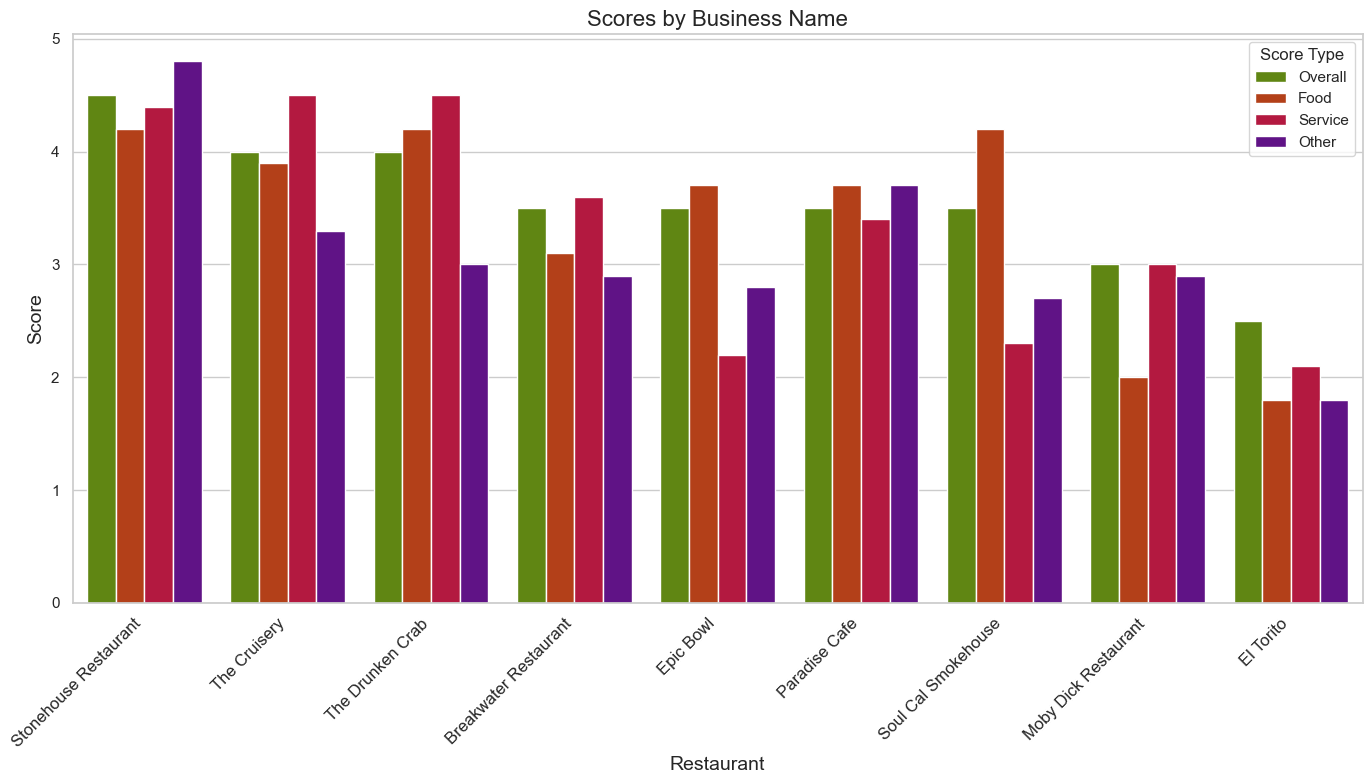

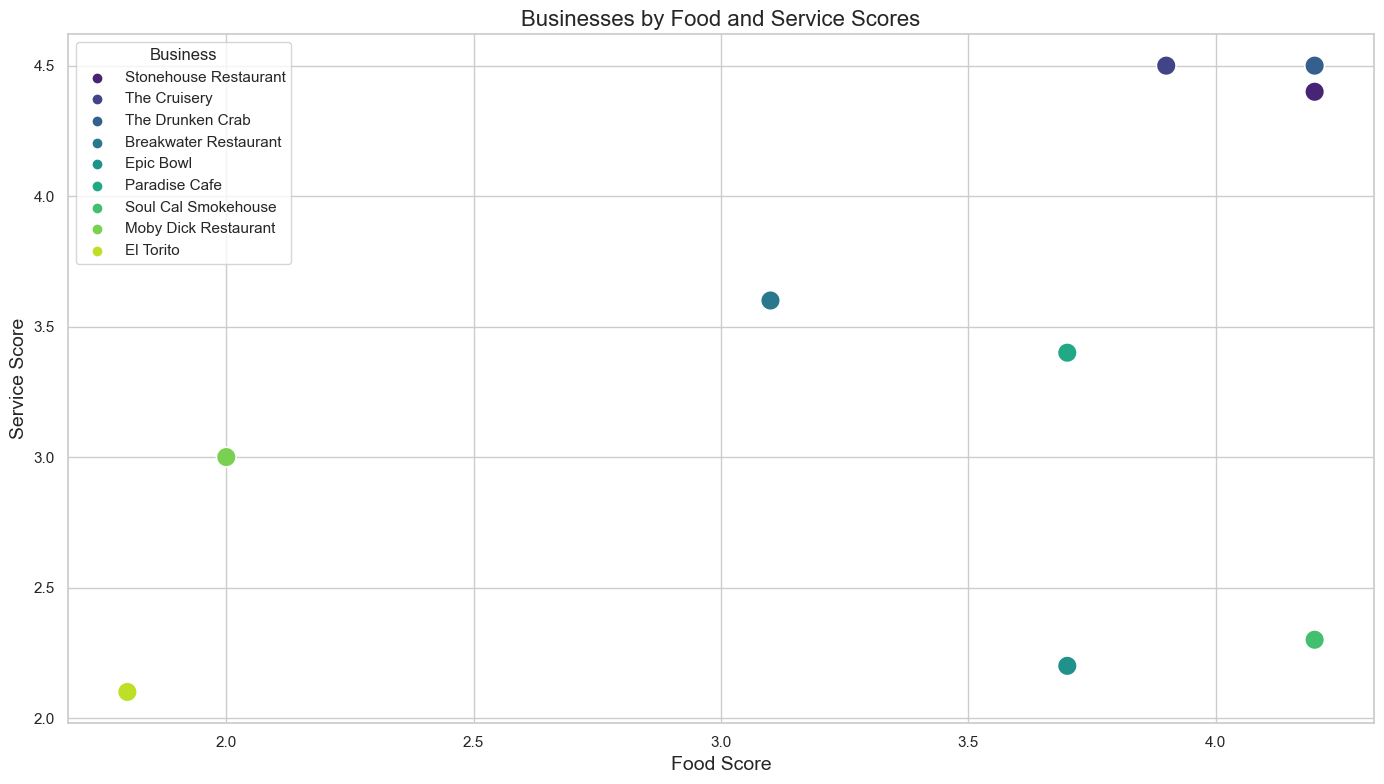

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Melt the DataFrame to long format for seaborn
df_melted = business_df.melt(id_vars='Business', value_vars=['Overall', 'Food', 'Service', 'Other'],
                             var_name='Score Type', value_name='Score')

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar plot with business_name on x-axis, Score on y-axis, and Score Type as hue
sns.barplot(x='Business', y='Score', hue='Score Type', data=df_melted, palette='brg_r')

# Set titles and labels
plt.title('Scores by Business Name', fontsize=16)
plt.xlabel('Restaurant', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)

# Adjust the legend
plt.legend(title='Score Type')

# Show the plot
plt.tight_layout()
plt.show()

# Generate a scatter plot for Food vs. Service scores
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Food', y='Service', data=business_df, s=200, hue='Business', palette='viridis')

# Set titles and labels
plt.title('Businesses by Food and Service Scores', fontsize=16)
plt.xlabel('Food Score', fontsize=14)
plt.ylabel('Service Score', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Using the scatter plot in conjunction with a gradient applied to our legend, we were able to get a very interesting comparision between the original score and the new adjusted scores for food and service. Lighter points indicate lower overall scores, and darken as the score increases for each restaurant. What is interesting about this is that while it does follow the expected trend of darkening dots as we go from left to right and bottom to top, there are some interesting points to mention. The businesses that are interesting are Paradise Cafe and Soul Cal Smokehouse. These are both middle range businesses, however, they both indicate having better service than Epic Bowl, and better food than Breakwater Restaurant. Despite this insight, they both have lower overall scores than either. This kind of insight could be extremely valuable to business owners as they would be able to get actively measureable feedback on very specific aspects of their restaurants. Knowing that they are strong in food but weak in service, they could invest in training programs or hiring better service staff and watch their dot move across the plot over time as new reviews come in. Traditional business insights from text mining rely on generalized insights where owners still need to read between the lines of a wordcloud, but having opinions partitioned into quantifiable bits would allow them to assign a dollar value to their customer's opinions. 

Looking at the spread of scores across the board, we can see that there can be significant differences in the overall opinion of the same restaurant depending on which category is considered. There didn't seem to be a particular trend toward food, service, or other being more likely to be higher or lower than the overall score. This provides some small evidence that we're not introducing bias with our calculation and that improving either our classification or sentiment capabilities would result in clearer opinion granularity. 

A few recommendations we have for improving our analysis would be to develop accuracy metrics so we can better support our findings. We did some extensive deep diving into POS and dependency parsing with spaCy, comparing each tag's contribution to the overall sentiment of a sentence but didn't extract enough insight to use it. From that, however, we were able to decide on using VADER over TextBlob. If we could continue working on this, we'd continue investigating a mixed use application of VADER sentiment with TextBlob subjectivity as we found some intriguing correlations between the two. In particular, taking a closer look at the sentences that went against the overall correlative relationship between these sentiment metrics to see if we could identify semantic patterns. Additional work could be done with classifying more categories of review, however, since our calculations depend on the text being broken up into constituent parts, each new category would considerably increase the rows of data we'd need to process. If we had more time, developing a CNN for classification and a RNN for sentiment would be our recommendation. The language nuances are too complex for simpler sentiment models like VADER, but if we could glean some insight from the relationship of TextBlob and VADER, there could be some more sentiment and context to perserve.

# Section 7: Conclusion

Our analysis successfully demonstrates a novel approach to refining restaurant review scores on Yelp by focusing on individual categories. By segmenting reviews and applying sentiment analysis, we provide a more granular understanding of user opinions. This method underscores the potential for using text mining techniques to deliver nuanced insights that go beyond traditional average ratings, offering users and business owners a clearer picture of specific strengths and weaknesses. Our approach helps users make more informed dining choices based on their preferences and provides actionable feedback for business owners to improve targeted aspects of their service.

There are significant limiations to our approach since we were unable to complete the more advanced methods we were originally pursuing. The reliance on sentiment analysis models like VADER may miss some of the nuances in review language, particularly in detecting sarcasm or complex emotional expressions. Additionally, the segmentation process doesn't perfectly isolate topics and we limited ourselves to only two of the most common themes among restaurant reviews. The current approach also requires substantial computational resources, especially when categorizing multiple aspects of reviews, which may limit scalability. Most importantly, the lack of accuracy metrics in our current analysis restricts our ability to quantify the performance and reliability of our model. Despite all these limitations, we were still able to generate meaningful insights into the feasibiliy of granular review score adjustment, which encourages us to look deeper into the subject to try and improve our results. 

Future work would focus on enhancing the accuracy of sentiment analysis and topic classification by exploring advanced machine learning models such as Convolutional Neural Networks (CNNs) for classification and Recurrent Neural Networks (RNNs) for sentiment analysis. Investigating a hybrid model that combines VADER’s sentiment capabilities with TextBlob’s subjectivity analysis could hold the key to unlocking deeper insights into the contextual nuances of reviews. It would also be interesting to include more categories to see if the model holds up, or if we are constrained by the data becoming too sparse as we increase dimensions. Developing better accuracy metrics  will be critcal to support and validate our results. Further studies could also explore the application of this methodology across other domains, such as retail or hospitality, to assess its adaptability and effectiveness in various contexts, or develop a generalized model that can be applied to any review domain.

Overall, this study lays a foundation for further exploration of turning user-generated content into numeric insights, bridging the gap between qualitative feedback and quantitative metrics, and offering valuable tools for both consumers and businesses.

# Section 8: References

1. Al-Khiza’ay, Muhmmad et al. “PeRView: A Framework for Personalized Review Selection Using Micro-Reviews.” arXiv.org (2018): n. pag. Web.


2. Ali, Twil, Bencharef Omar, and Kaloun Soulaimane. “Analyzing Tourism Reviews Using an LDA Topic-Based Sentiment Analysis Approach.” MethodsX 9 (2022): 101894–101894. Web.

3. Egger, Roman, and Joanne Yu. “Identifying Hidden Semantic Structures in Instagram Data: A Topic Modelling Comparison.” Tourism review (Association internationale d’experts scientifiques du tourisme) 77.4 (2022): 1234–1246. Web.

4. Elkouri, Andrew. “Predicting the Sentiment Polarity and Rating of Yelp Reviews.” arXiv.org (2015): n. pag. Web.

5.  Tang, Min et al. “Integrating Topic, Sentiment, and Syntax for Modeling Online Reviews: A Topic Model Approach.” Journal of computing and information science in engineering 19.1 (2019): n. pag. Web.